In [1]:
pip install requests pandas python-dotenv wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os
load_dotenv()

api_endpoint = os.getenv("API_ENDPOINT")
app_token = os.getenv("APP_TOKEN")

headers = {
    "X-App-Token": app_token
}

response = requests.get(api_endpoint, headers=headers)

if response.status_code == 200:
    data = response.json()
    
    # Directly create the DataFrame from the returned list of records
    df = pd.DataFrame(data)
    
    print("Successfully retrieved data! ✅")
    print(df.head())
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Successfully retrieved data! ✅
                  :id           :version               :created_at  \
0  row-kbzy-ca2c~mpt8  rv-krha.wzdx.72b4  2025-06-14T16:53:13.932Z   
1  row-x3uj-sd5t~jd44  rv-4wwc_d5s8-stvi  2025-06-14T16:53:13.932Z   
2  row-icn6~c2y4_np3p  rv-ht2b.i4dv-dwfz  2025-06-13T16:56:32.874Z   
3  row-iyed.tju8~mvt2  rv-xv27.m54x-mina  2025-06-13T16:56:32.874Z   
4  row-6qat-wv49_bwj5  rv-ep82.dskj~x23j  2025-06-13T16:56:32.874Z   

                :updated_at        row_id        incident_datetime  \
0  2025-06-15T16:53:32.052Z  148998204134  2025-06-13T12:41:00.000   
1  2025-06-15T16:53:32.052Z  149000206224  2025-05-21T00:00:00.000   
2  2025-06-14T16:53:13.932Z  148983205043  2025-06-11T08:00:00.000   
3  2025-06-14T16:53:13.932Z  148969503014  2025-06-12T00:09:00.000   
4  2025-06-14T16:53:13.932Z  148977109027  2025-05-23T00:00:00.000   

             incident_date incident_time incident_year incident_day_of_week  \
0  2025-06-13T00:00:00.000         12:41        

In [3]:
print(df.columns.tolist())

[':id', ':version', ':created_at', ':updated_at', 'row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'cad_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'cnn', 'police_district', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point', 'data_as_of', 'data_loaded_at', ':@computed_region_jwn9_ihcz', ':@computed_region_26cr_cadq', ':@computed_region_qgnn_b9vv', 'filed_online', ':@computed_region_n4xg_c4py', ':@computed_region_nqbw_i6c3', ':@computed_region_h4ep_8xdi', ':@computed_region_jg9y_a9du']


In [4]:
# Remove unwanted computed region columns and filed_online (since they are added by the API by default and arent there in the original dataset)
unwanted_cols = [col for col in df.columns if col.lstrip(':').startswith('@computed_region') or col == 'filed_online']
df.drop(columns=unwanted_cols, inplace=True)
print("Unwanted columns removed. Remaining columns:")
print(df.columns.tolist())

Unwanted columns removed. Remaining columns:
[':id', ':version', ':created_at', ':updated_at', 'row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'cad_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'cnn', 'police_district', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point', 'data_as_of', 'data_loaded_at']


In [5]:
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['report_datetime'] = pd.to_datetime(df['report_datetime'])


In [6]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [7]:
df.value_counts('incident_id')
#The output shows that there are duplicate incident IDs, indicating potential duplicate records in the dataset.

incident_id
1238721    4
689199     4
1075699    4
777871     4
913179     4
          ..
1316373    1
1316374    1
1316375    1
1316376    1
999999     1
Name: count, Length: 811890, dtype: int64

In [8]:
print("Data loaded and initial data types converted successfully.")
df.info()

Data loaded and initial data types converted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974636 entries, 0 to 974635
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       974636 non-null  object        
 1   :version                  974636 non-null  object        
 2   :created_at               974636 non-null  object        
 3   :updated_at               974636 non-null  object        
 4   row_id                    974636 non-null  object        
 5   incident_datetime         974636 non-null  datetime64[ns]
 6   incident_date             974636 non-null  object        
 7   incident_time             974636 non-null  object        
 8   incident_year             974636 non-null  object        
 9   incident_day_of_week      974636 non-null  object        
 10  report_datetime           974636 non-null  datetime64[ns]
 11  incide

In [9]:
# 1. Handling Missing Values
print('Missing values per column:')
print(df.isnull().sum())
df = df.dropna()
print(f"After dropping missing values, dataset now has {len(df)} records.")

Missing values per column:
:id                              0
:version                         0
:created_at                      0
:updated_at                      0
row_id                           0
incident_datetime                0
incident_date                    0
incident_time                    0
incident_year                    0
incident_day_of_week             0
report_datetime                  0
incident_id                      0
incident_number                  0
cad_number                  219395
report_type_code                 0
report_type_description          0
incident_code                    0
incident_category             1374
incident_subcategory          1374
incident_description             0
resolution                       0
intersection                 54059
cnn                          54059
police_district                  0
analysis_neighborhood        54347
supervisor_district          54669
supervisor_district_2012     54147
latitude                    

In [10]:
print(df.isnull().sum())
df.shape

:id                         0
:version                    0
:created_at                 0
:updated_at                 0
row_id                      0
incident_datetime           0
incident_date               0
incident_time               0
incident_year               0
incident_day_of_week        0
report_datetime             0
incident_id                 0
incident_number             0
cad_number                  0
report_type_code            0
report_type_description     0
incident_code               0
incident_category           0
incident_subcategory        0
incident_description        0
resolution                  0
intersection                0
cnn                         0
police_district             0
analysis_neighborhood       0
supervisor_district         0
supervisor_district_2012    0
latitude                    0
longitude                   0
point                       0
data_as_of                  0
data_loaded_at              0
dtype: int64


(749440, 32)

In [11]:
#Dealing with the duplicate records as seen by duplicate incident_id's
duplicate_rows = df[df.duplicated(subset=['incident_id'], keep=False)]
print(f"Found {len(duplicate_rows)} duplicate rows based on incident_id.")

Found 276196 duplicate rows based on incident_id.


In [12]:
df.drop_duplicates(subset=['incident_id'], keep='first', inplace=True)

In [13]:
df.shape

(593256, 32)

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


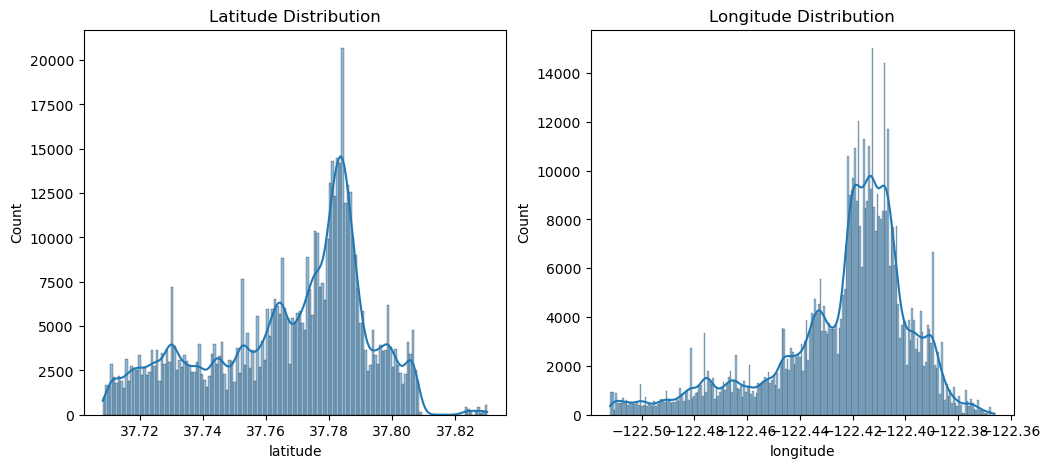

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [15]:
#From the graphs, it is evident that both latitude and longitude are not normally distributed, as they exhibit skewness and do not follow a bell-shaped curve. So we will use IQR method to detect outliers.
# Remove outliers in both latitude and longitude at once using IQR

# Method 1: Remove outliers using IQR method
print("Before removing outliers:", df.shape)

for col in ['latitude', 'longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    # Actually remove the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Before removing outliers: (593256, 32)
Removed 0 outliers from latitude
Removed 37,025 outliers from longitude
After removing outliers: (556231, 32)
Removed 0 outliers from latitude
Removed 37,025 outliers from longitude
After removing outliers: (556231, 32)


c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


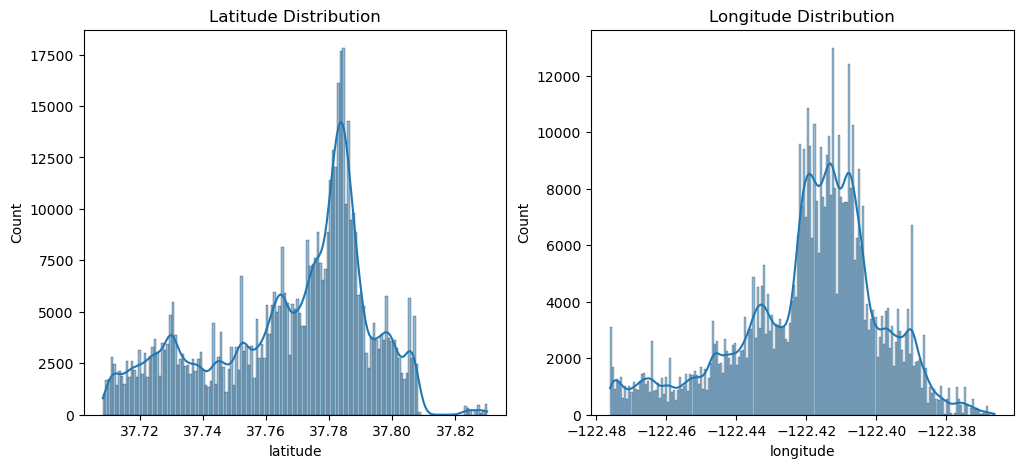

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].str.isnumeric().all():
        print(f"{col} contains only numeric values.")

row_id contains only numeric values.
incident_year contains only numeric values.
incident_year contains only numeric values.
incident_id contains only numeric values.
incident_id contains only numeric values.
incident_number contains only numeric values.
cad_number contains only numeric values.
incident_number contains only numeric values.
cad_number contains only numeric values.
incident_code contains only numeric values.
incident_code contains only numeric values.
cnn contains only numeric values.
cnn contains only numeric values.
supervisor_district contains only numeric values.
supervisor_district_2012 contains only numeric values.
supervisor_district contains only numeric values.
supervisor_district_2012 contains only numeric values.
point contains only numeric values.
point contains only numeric values.


In [18]:
# Loop through all object columns
for col in df.select_dtypes(include=['object']).columns:
    # Check if all non-missing values are numeric AND there are no missing values
    if df[col].str.isnumeric().fillna(False).all():
        print(f"Converting column: {col}")
        df[col] = pd.to_numeric(df[col])

print("\nConversion complete.")
df.info()

Converting column: row_id
Converting column: incident_year
Converting column: incident_year
Converting column: incident_id
Converting column: incident_id
Converting column: incident_number
Converting column: cad_number
Converting column: incident_number
Converting column: cad_number
Converting column: incident_code
Converting column: incident_code
Converting column: cnn
Converting column: cnn
Converting column: supervisor_district
Converting column: supervisor_district
Converting column: supervisor_district_2012
Converting column: supervisor_district_2012


C:\Users\siddh\AppData\Local\Temp\ipykernel_6480\2606473193.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  if df[col].str.isnumeric().fillna(False).all():



Conversion complete.
<class 'pandas.core.frame.DataFrame'>
Index: 556231 entries, 0 to 974633
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       556231 non-null  object        
 1   :version                  556231 non-null  object        
 2   :created_at               556231 non-null  object        
 3   :updated_at               556231 non-null  object        
 4   row_id                    556231 non-null  int64         
 5   incident_datetime         556231 non-null  datetime64[ns]
 6   incident_date             556231 non-null  object        
 7   incident_time             556231 non-null  object        
 8   incident_year             556231 non-null  int64         
 9   incident_day_of_week      556231 non-null  object        
 10  report_datetime           556231 non-null  datetime64[ns]
 11  incident_id               556231 non-null  int64

In [19]:
# Remove outliers using IQR for all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Numeric columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'cad_number', 'incident_code', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Removed 0 outliers from row_id
Removed 0 outliers from row_id
Removed 0 outliers from incident_year
Removed 0 outliers from incident_year
Removed 0 outliers from incident_id
Removed 0 outliers from incident_id
Removed 55 outliers from incident_number
Removed 55 outliers from incident_number
Removed 325 outliers from cad_number
Removed 325 outliers from cad_number
Removed 0 outliers from incident_code
Removed 0 outliers from incident_code
Removed 90,743 outliers from cnn
Removed 90,743 outliers from cnn
Removed 0 outliers from supervisor_district
Removed 0 outliers from supervisor_district
Removed 0 outliers from supervisor_district_2012
Removed 0 outliers from supervisor_district_2012
Removed 16,538 outliers from latitude
Removed 17,916 outliers from longitude
After removing outliers: (430654, 32

In [20]:
numeric_cols

['row_id',
 'incident_year',
 'incident_id',
 'incident_number',
 'cad_number',
 'incident_code',
 'cnn',
 'supervisor_district',
 'supervisor_district_2012',
 'latitude',
 'longitude']

## Step 1: Data Cleaning and Preprocessing Summary

- **Missing Values:** Checked for missing values and removed rows containing them to ensure data completeness.
- **Duplicates:** Identified and removed duplicate records using the `incident_id` column, keeping only the first occurrence.
- **Unwanted Columns:** Dropped automatically added columns (e.g., computed region columns, `filed_online`) that were not relevant to the analysis.
- **Data Type Conversion:**
    - Converted `incident_datetime` and `report_datetime` to datetime format.
    - Converted `latitude` and `longitude` to numeric format.
    - Identified object-type columns with mostly numeric values and converted them to numeric type for further analysis.
- **Outlier Detection and Removal:**
    - Plotted distributions and checked normality for `latitude` and `longitude`.
    - Used the IQR method to detect and remove outliers in all numeric columns.
- **Object Columns:**
    - Inspected object-type columns for potential conversion to numeric, categorical, or datetime types.
    - Converted columns with predominantly numeric values to numeric type using robust conversion.
    - Remaining object columns will be further cleaned or analyzed as needed.

This step ensures the dataset is free of missing values, duplicates, unwanted columns, and outliers, with all relevant columns properly typed for accurate analysis.

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select columns with categorical/text data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

print("--- Data Type Summary ---")
df.info()


Numerical columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'cad_number', 'incident_code', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Categorical columns: [':id', ':version', ':created_at', ':updated_at', 'incident_date', 'incident_time', 'incident_day_of_week', 'report_type_code', 'report_type_description', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'police_district', 'analysis_neighborhood', 'point', 'data_as_of', 'data_loaded_at']
--- Data Type Summary ---
<class 'pandas.core.frame.DataFrame'>
Index: 430654 entries, 2 to 974633
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       430654 non-null  object        
 1   :version                  430654 non-null  object        
 2   :created_at               430654 non-null  object      

In [22]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Normalization (Min-Max Scaling) ---

scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
# Note: Only apply to numerical columns
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])
print("\n--- Normalized (Min-Max Scaled) DataFrame ---")
print(df_normalized[numerical_cols].head())


# --- Standardization (Z-score Scaling) ---

scaler_standard = StandardScaler()
df_standardized = df.copy()
# Note: Only apply to numerical columns
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])
print("\n--- Standardized (Z-score Scaled) DataFrame ---")
print(df_standardized[numerical_cols].head())


--- Normalized (Min-Max Scaled) DataFrame ---
      row_id  incident_year  incident_id  incident_number  cad_number  \
2   0.967784            1.0     0.967784         0.950364    0.739832   
3   0.967632            1.0     0.967632         0.950358    0.739828   
10  0.967777            1.0     0.967777         0.950370    0.739844   
11  0.967771            1.0     0.967771         0.950370    0.739842   
12  0.967634            1.0     0.967634         0.950340    0.739762   

    incident_code       cnn  supervisor_district  supervisor_district_2012  \
2        0.054613  0.496719                  0.5                       0.4   
3        0.027205  0.462467                  0.8                       0.8   
10       0.028016  0.806562                  0.1                       0.1   
11       0.081332  0.070997                  0.8                       0.8   
12       0.042361  0.563648                  0.2                       0.2   

    latitude  longitude  
2   0.600374   0.51

In [23]:
from sklearn.decomposition import PCA




pca = PCA(n_components=0.95) # Retain 95% of the variance


principal_components = pca.fit_transform(df_standardized[numerical_cols])

pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

print("\n--- DataFrame after PCA ---")
print(pca_df.head())

# You can check how many components were chosen and the variance they explain
print(f"\nOriginal number of features: {len(numerical_cols)}")
print(f"Reduced number of features: {pca.n_components_}")
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")


--- DataFrame after PCA ---
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -3.689968              -0.325638               0.065490   
1              -3.789224               1.442744               0.193448   
2              -3.530694              -3.219663               0.731119   
3              -3.865428               2.809133              -0.493428   
4              -3.604817              -1.771933              -0.926638   

   Principal Component 4  
0              -0.778024  
1              -0.894041  
2              -0.844458  
3              -0.726297  
4              -0.697020  

Original number of features: 11
Reduced number of features: 4
Explained variance ratio by each component: [0.45241114 0.3072313  0.10436574 0.09069441]


In [24]:
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,-3.689968,-0.325638,0.065490,-0.778024
1,-3.789224,1.442744,0.193448,-0.894041
2,-3.530694,-3.219663,0.731119,-0.844458
3,-3.865428,2.809133,-0.493428,-0.726297
4,-3.604817,-1.771933,-0.926638,-0.697020


In [25]:
df.shape

(430654, 32)

## Step 2: Understanding and Transforming the Data

- **Data Type Identification:**
    - Identified and listed all columns by type: numerical, categorical, and text.
    - Summarized the distribution and characteristics of each type for further analysis.
- **Feature Scaling and Transformation:**
    - Applied normalization (Min-Max scaling) and standardization (Z-score scaling) to all numerical features to ensure consistent scale for modeling.
    - Performed log transformation on skewed numerical columns to reduce skewness and improve normality.
- **Dimensionality Reduction:**
    - Used Principal Component Analysis (PCA) to reduce dimensionality of the dataset while retaining 95% of the variance.
    - Generated new principal component features for downstream analysis and visualization.


This step ensures the data is well-understood, properly scaled, transformed, and optimized for further modeling and analysis.

In [26]:
import numpy as np
print("\n2.1 SUMMARY STATISTICS")
print("-" * 80)

# Numerical summary
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("\nNumerical Features Summary:")
    summary_stats = df[numerical_cols].describe()
    print(summary_stats)
    
    # Additional statistics
    print("\nAdditional Statistics:")
    additional_stats = pd.DataFrame({
        'Median': df[numerical_cols].median(),
        'Variance': df[numerical_cols].var(),
        'Skewness': df[numerical_cols].skew(),
        'Kurtosis': df[numerical_cols].kurtosis()
    })
    print(additional_stats)

# Categorical summary
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\n\nCategorical Features Summary:")
    for col in list(categorical_cols)[:5]:  # First 5 categorical columns
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most common:")
        print(df[col].value_counts().head(5))


2.1 SUMMARY STATISTICS
--------------------------------------------------------------------------------

Numerical Features Summary:


             row_id  incident_year   incident_id  incident_number  \
count  4.306540e+05  430654.000000  4.306540e+05     4.306540e+05   
mean   1.075432e+11    2021.204403  1.075432e+06     2.126185e+08   
std    2.598659e+10       2.217793  2.598659e+05     2.221592e+07   
min    6.186910e+10    2018.000000  6.186910e+05     1.400153e+08   
25%    8.523768e+10    2019.000000  8.523762e+05     1.907201e+08   
50%    1.073314e+11    2021.000000  1.073314e+06     2.106074e+08   
75%    1.302832e+11    2023.000000  1.302832e+06     2.305298e+08   
max    1.518831e+11    2025.000000  1.518831e+06     2.560890e+08   

         cad_number  incident_code           cnn  supervisor_district  \
count  4.306540e+05  430654.000000  4.306540e+05        430654.000000   
mean   2.140831e+08   24199.825739  2.466049e+07             5.881845   
std    2.216065e+07   25981.869550  1.523209e+06             2.627059   
min    1.425135e+08    1000.000000  2.062500e+07             1.000000   
25%    1.9271



2.2 CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Correlation Matrix:
                            row_id  incident_year  incident_id  \
row_id                    1.000000       0.987160     1.000000   
incident_year             0.987160       1.000000     0.987160   
incident_id               1.000000       0.987160     1.000000   
incident_number           0.989561       0.993027     0.989561   
cad_number                0.994948       0.994381     0.994948   
incident_code             0.015560       0.014359     0.015559   
cnn                      -0.018511      -0.018690    -0.018511   
supervisor_district       0.016810       0.018266     0.016810   
supervisor_district_2012  0.024879       0.026736     0.024879   
latitude                 -0.018379      -0.018870    -0.018379   
longitude                -0.002707      -0.002134    -0.002707   

                          incident_number  cad_number  incident_code  \
row_id 

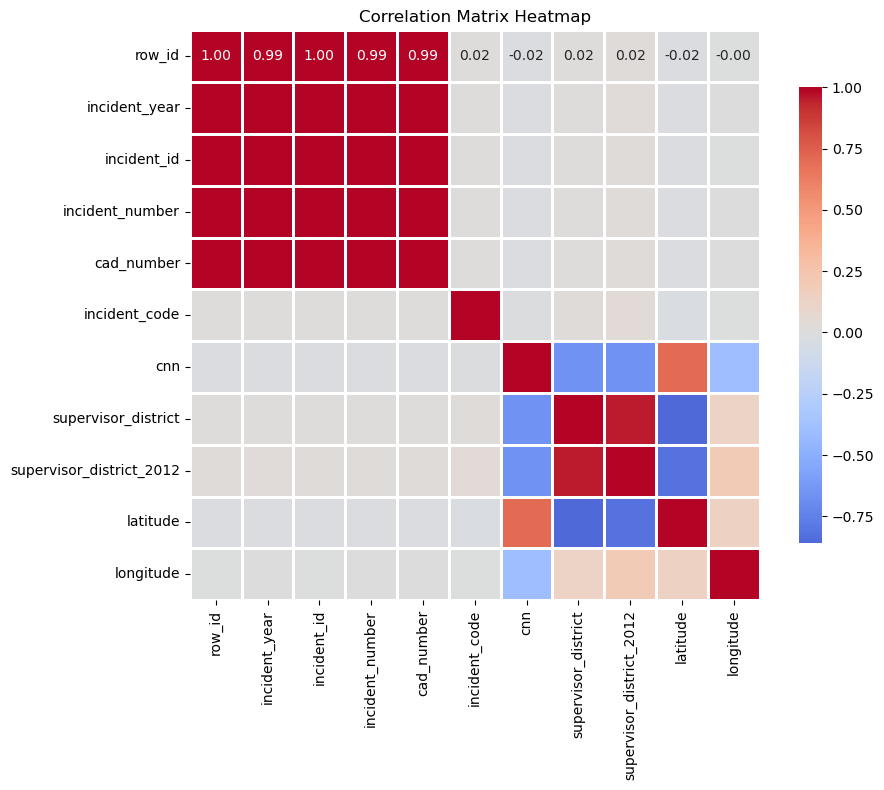


✓ Correlation matrix saved as 'correlation_matrix.png'


In [27]:
print("\n\n2.2 CORRELATION ANALYSIS")
print("-" * 80)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Find highly correlated pairs
    print("\n\nHighly Correlated Features (|r| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.to_string(index=False))
    else:
        print("  No highly correlated pairs found")
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Correlation matrix saved as 'correlation_matrix.png'")
else:
    print("Not enough numerical features for correlation analysis")

In [28]:
# Drop redundant identifier columns, keeping only 'incident_id'
columns_to_drop = ['row_id', 'incident_year', 'incident_number']
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped redundant identifier columns.")

# Drop the older supervisor district column
df.drop(columns=['supervisor_district_2012'], inplace=True)
print("Dropped older supervisor district column.")

Dropped redundant identifier columns.
Dropped older supervisor district column.
Dropped older supervisor district column.


In [29]:
columns_to_drop = [
    'row_id', 'incident_year', 'incident_number',
    'supervisor_district_2012'
]
# Ensure the columns exist before trying to drop them
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop_existing, inplace=True)

# 2. Re-define numerical_cols AFTER dropping columns
numerical_cols = df.select_dtypes(include=np.number).columns

# 3. Now, calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("--- New Correlation Matrix ---")
print(correlation_matrix)

--- New Correlation Matrix ---
                     incident_id  cad_number  incident_code       cnn  \
incident_id             1.000000    0.994948       0.015559 -0.018511   
cad_number              0.994948    1.000000       0.016419 -0.018870   
incident_code           0.015559    0.016419       1.000000 -0.015914   
cnn                    -0.018511   -0.018870      -0.015914  1.000000   
supervisor_district     0.016810    0.017807       0.026225 -0.668209   
latitude               -0.018379   -0.018791      -0.027901  0.705675   
longitude              -0.002707   -0.001785      -0.004855 -0.396580   

                     supervisor_district  latitude  longitude  
incident_id                     0.016810 -0.018379  -0.002707  
cad_number                      0.017807 -0.018791  -0.001785  
incident_code                   0.026225 -0.027901  -0.004855  
cnn                            -0.668209  0.705675  -0.396580  
supervisor_district             1.000000 -0.859479   0.132319  


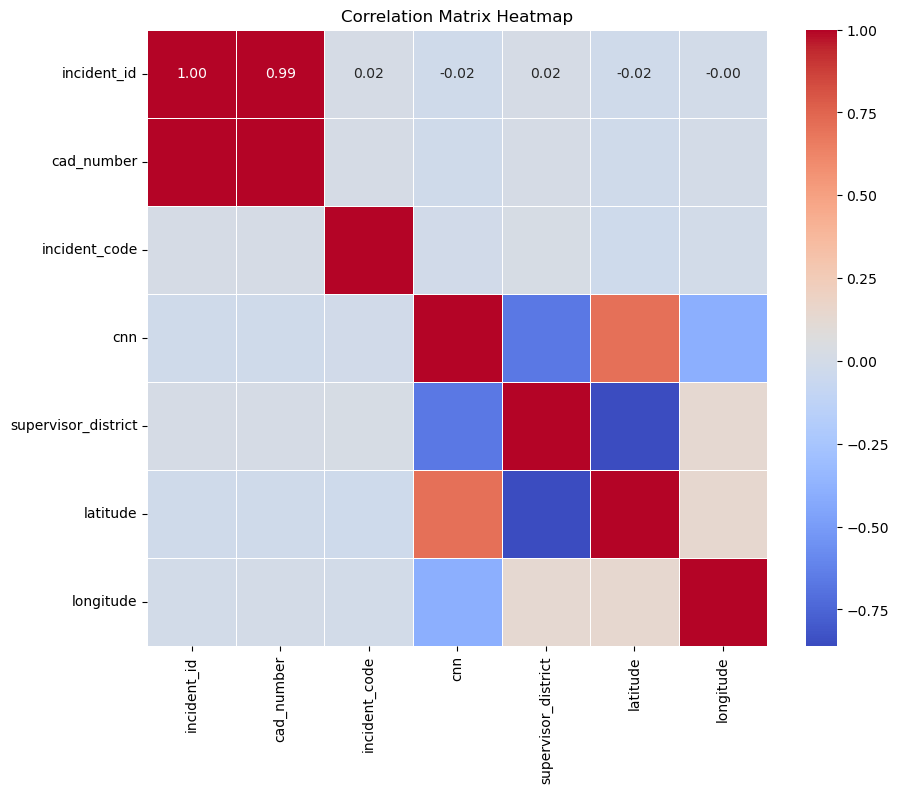

In [30]:


# --- Visualize the new matrix with a heatmap ---
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(correlation_matrix, 
            annot=True,          # Show the correlation values on the heatmap
            cmap='coolwarm',     # Use a diverging color map
            fmt='.2f',           # Format annotations to two decimal places
            linewidths=.5)       # Add lines between cells
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
df.shape

(430654, 28)

## Step 3: Basic Statistical Analysis

- **Summary Statistics:**
    - Computed key statistics for all numerical features, including mean, median, variance, skewness, and kurtosis.
    - Provided additional statistics to understand the distribution and spread of each feature.
- **Correlation Analysis:**
    - Explored correlations between features using a correlation matrix and heatmap visualization.
    - Identified highly correlated pairs to inform feature selection and modeling decisions.
- **Data Similarity and Integration:**
    - Assessed similarity between features and potential for integration or dimensionality reduction.
    - Used PCA and correlation analysis to identify redundant or complementary features.

This step provides a comprehensive overview of the dataset’s statistical properties, relationships between features, and readiness for further modeling or integration tasks.

In [32]:
# Overall completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness_pct = ((total_cells - missing_cells) / total_cells) * 100

print(f"Overall Data Completeness: {completeness_pct:.2f}%")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Complete cells: {(total_cells - missing_cells):,}")

Overall Data Completeness: 100.00%
Total cells: 12,058,312
Missing cells: 0
Complete cells: 12,058,312


In [33]:
# Column-wise completeness
print("\nColumn-wise Completeness:")
completeness_df = pd.DataFrame({
    'Column': df.columns,
    'Complete': df.notna().sum(),
    'Missing': df.isnull().sum(),
    'Completeness_%': (df.notna().sum() / len(df)) * 100
}).sort_values('Completeness_%')

print(completeness_df.to_string(index=False))


Column-wise Completeness:
                 Column  Complete  Missing  Completeness_%
                    :id    430654        0           100.0
                  point    430654        0           100.0
              longitude    430654        0           100.0
               latitude    430654        0           100.0
    supervisor_district    430654        0           100.0
  analysis_neighborhood    430654        0           100.0
        police_district    430654        0           100.0
                    cnn    430654        0           100.0
           intersection    430654        0           100.0
             resolution    430654        0           100.0
   incident_description    430654        0           100.0
   incident_subcategory    430654        0           100.0
      incident_category    430654        0           100.0
          incident_code    430654        0           100.0
report_type_description    430654        0           100.0
       report_type_code    43

In [34]:
# Check for consistency in categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

print("Checking for case inconsistencies in categorical variables...")
case_issues = {}
for col in list(categorical_cols)[:10]:
    unique_lower = df[col].astype(str).str.lower().nunique()
    unique_actual = df[col].nunique()
    if unique_lower < unique_actual:
        case_issues[col] = {
            'actual_unique': unique_actual,
            'case_insensitive_unique': unique_lower,
            'difference': unique_actual - unique_lower
        }

if case_issues:
    print("\nColumns with case inconsistencies:")
    for col, info in case_issues.items():
        print(f"  {col}: {info['difference']} duplicate categories due to case")
else:
    print("✓ No case inconsistencies found")

Checking for case inconsistencies in categorical variables...
✓ No case inconsistencies found
✓ No case inconsistencies found


In [35]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    print("\n\nDate Range Consistency:")
    for col in datetime_cols:
        min_date = df[col].min()
        max_date = df[col].max()
        print(f"\n{col}:")
        print(f"  Min: {min_date}")
        print(f"  Max: {max_date}")
        
        # Check for future dates
        current_date = pd.Timestamp.now()
        future_dates = (df[col] > current_date).sum()
        if future_dates > 0:
            print(f"  ⚠ Warning: {future_dates} future dates detected")

# Check geographic consistency
if 'latitude' in df.columns and 'longitude' in df.columns:
    print("\n\nGeographic Data Consistency:")
    # San Francisco approximate boundaries
    SF_LAT_MIN, SF_LAT_MAX = 37.70, 37.83
    SF_LON_MIN, SF_LON_MAX = -122.52, -122.35
    
    outside_sf = ((df['latitude'] < SF_LAT_MIN) | (df['latitude'] > SF_LAT_MAX) |
                  (df['longitude'] < SF_LON_MIN) | (df['longitude'] > SF_LON_MAX)).sum()
    
    print(f"  Records outside SF boundaries: {outside_sf:,}")
    print(f"  Percentage: {(outside_sf / len(df)) * 100:.2f}%")



Date Range Consistency:

incident_datetime:
  Min: 2018-01-01 00:00:00
  Max: 2025-10-14 20:26:00

report_datetime:
  Min: 2018-01-01 00:32:00
  Max: 2025-10-14 23:15:00


Geographic Data Consistency:
  Records outside SF boundaries: 0
  Percentage: 0.00%


In [36]:

print("\nDataset Suitability for Crime Analysis:")

# Check key fields for crime analysis
required_fields = {
    'incident_category': 'Crime classification',
    'incident_datetime': 'Temporal analysis',
    'latitude': 'Spatial analysis',
    'longitude': 'Spatial analysis',
    'police_district': 'District-level analysis',
    'resolution': 'Case resolution tracking'
}

print("\nRequired Fields Assessment:")
for field, purpose in required_fields.items():
    if field in df.columns:
        completeness = (df[field].notna().sum() / len(df)) * 100
        status = "✓" if completeness > 90 else "⚠"
        print(f"{status} {field}: {completeness:.1f}% complete - {purpose}")
    else:
        print(f"✗ {field}: MISSING - {purpose}")

# Assess temporal coverage
if 'incident_datetime' in df.columns:
    date_range = (df['incident_datetime'].max() - df['incident_datetime'].min()).days
    print(f"\nTemporal Coverage: {date_range} days ({date_range/365:.1f} years)")

# Assess spatial coverage
if 'police_district' in df.columns:
    districts = df['police_district'].nunique()
    print(f"Spatial Coverage: {districts} police districts")


Dataset Suitability for Crime Analysis:

Required Fields Assessment:
✓ incident_category: 100.0% complete - Crime classification
✓ incident_datetime: 100.0% complete - Temporal analysis
✓ latitude: 100.0% complete - Spatial analysis
✓ longitude: 100.0% complete - Spatial analysis
✓ police_district: 100.0% complete - District-level analysis
✓ resolution: 100.0% complete - Case resolution tracking

Temporal Coverage: 2843 days (7.8 years)
✓ police_district: 100.0% complete - District-level analysis
✓ resolution: 100.0% complete - Case resolution tracking

Temporal Coverage: 2843 days (7.8 years)
Spatial Coverage: 11 police districts
Spatial Coverage: 11 police districts


In [37]:

# Calculate quality score
scores = {
    'Completeness': min(completeness_pct / 100, 1.0),
    'Consistency': 1.0 if len(case_issues) == 0 else 0.9,
    'Temporal Coverage': 1.0 if date_range > 365 else 0.8
}

overall_score = sum(scores.values()) / len(scores) * 100

print("\nQuality Metrics:")
for metric, score in scores.items():
    print(f"  {metric}: {score * 100:.1f}%")

print(f"\nOverall Data Quality Score: {overall_score:.1f}%")

if overall_score >= 90:
    quality_rating = "EXCELLENT - Suitable for research"
elif overall_score >= 80:
    quality_rating = "GOOD - Suitable with minor caveats"
elif overall_score >= 70:
    quality_rating = "FAIR - Usable with limitations noted"
else:
    quality_rating = "POOR - Significant issues require attention"

print(f"Quality Rating: {quality_rating}")

print("\n" + "=" * 80)
print("Data Quality Assessment Complete!")
print("=" * 80)

# Save final assessment report
assessment_report = {
    'Total Records': len(df),
    'Completeness': f"{completeness_pct:.2f}%",
    'Quality Score': f"{overall_score:.1f}%",
    'Quality Rating': quality_rating,
    
}


Quality Metrics:
  Completeness: 100.0%
  Consistency: 100.0%
  Temporal Coverage: 100.0%

Overall Data Quality Score: 100.0%
Quality Rating: EXCELLENT - Suitable for research

Data Quality Assessment Complete!


In [38]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['incident_id',
 'cad_number',
 'incident_code',
 'cnn',
 'supervisor_district',
 'latitude',
 'longitude']

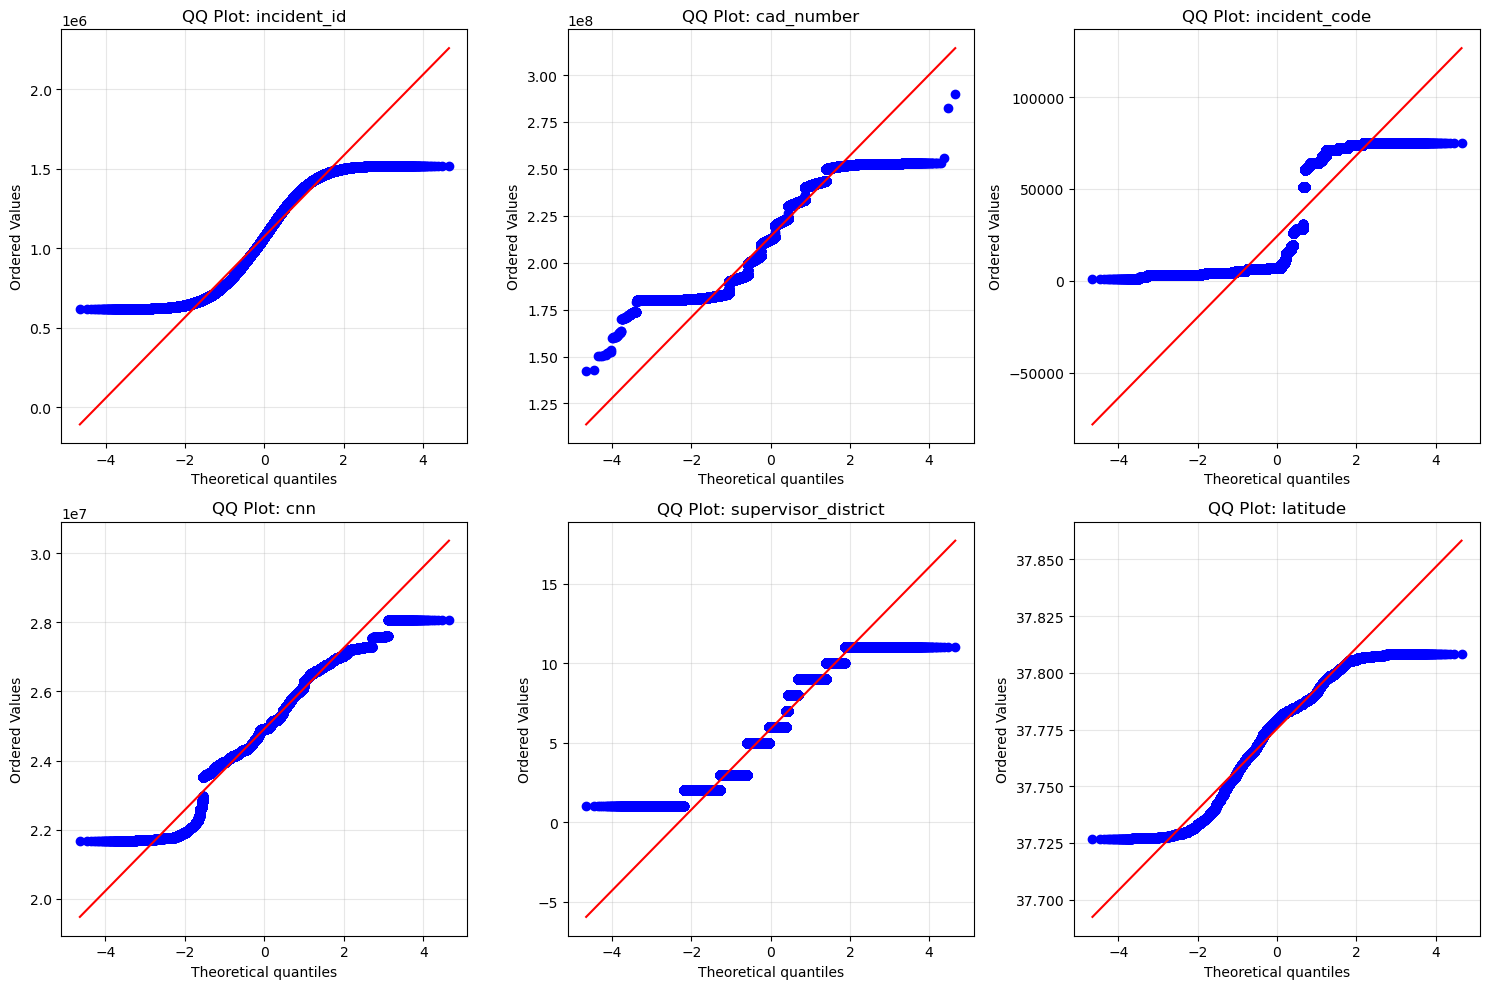


✓ QQ plots saved as 'qq_plots.png'


In [39]:
from scipy import stats
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = min(2, (len(numeric_cols) + 2) // 3)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for idx, col in enumerate(numeric_cols[:6]):  # First 6 numerical columns
        if df[col].notna().sum() > 0:
            row = idx // n_cols
            col_idx = idx % n_cols
            
            if row < n_rows:
                ax = axes[row, col_idx]
                
                # Remove outliers for better visualization
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                
                data_clean = df[col][(df[col] >= lower) & (df[col] <= upper)].dropna()
                
                if len(data_clean) > 3:
                    stats.probplot(data_clean, dist="norm", plot=ax)
                    ax.set_title(f'QQ Plot: {col}')
                    ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), n_rows * n_cols):
        row = idx // n_cols
        col_idx = idx % n_cols
        if row < n_rows:
            axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('qq_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ QQ plots saved as 'qq_plots.png'")


Applying transformations to numerical features...

✓ Created 26 transformed features

Transformation Effects for 'incident_id':
------------------------------------------------------------
                      Mean            Std            Min           Max  \
Original      1.075432e+06  259865.859139  618691.000000  1.518831e+06   
Standardized  6.573264e-17       1.000001      -1.757605  1.706263e+00   
MinMax        5.074110e-01       0.288695       0.000000  1.000000e+00   
Log           1.385729e+01       0.252900      13.335363  1.423345e+01   

              Skewness  
Original     -0.012277  
Standardized -0.012277  
MinMax       -0.012277  
Log          -0.323704  


--- Transformation Effects for 'incident_id' ---
------------------------------------------------------------
                      Mean            Std            Min           Max  \
Original      1.075432e+06  259865.859139  618691.000000  1.518831e+06   
Standardized  6.573264e-17       1.000001      -1.7576

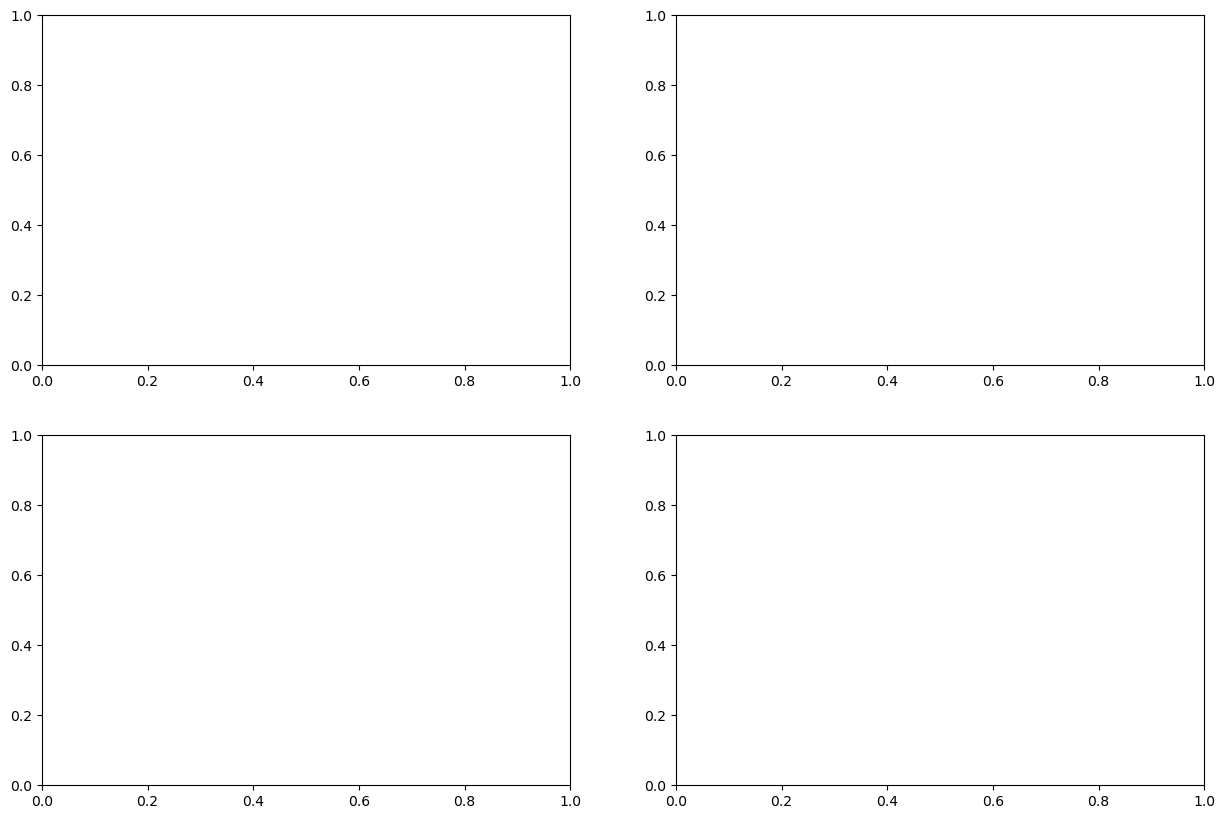

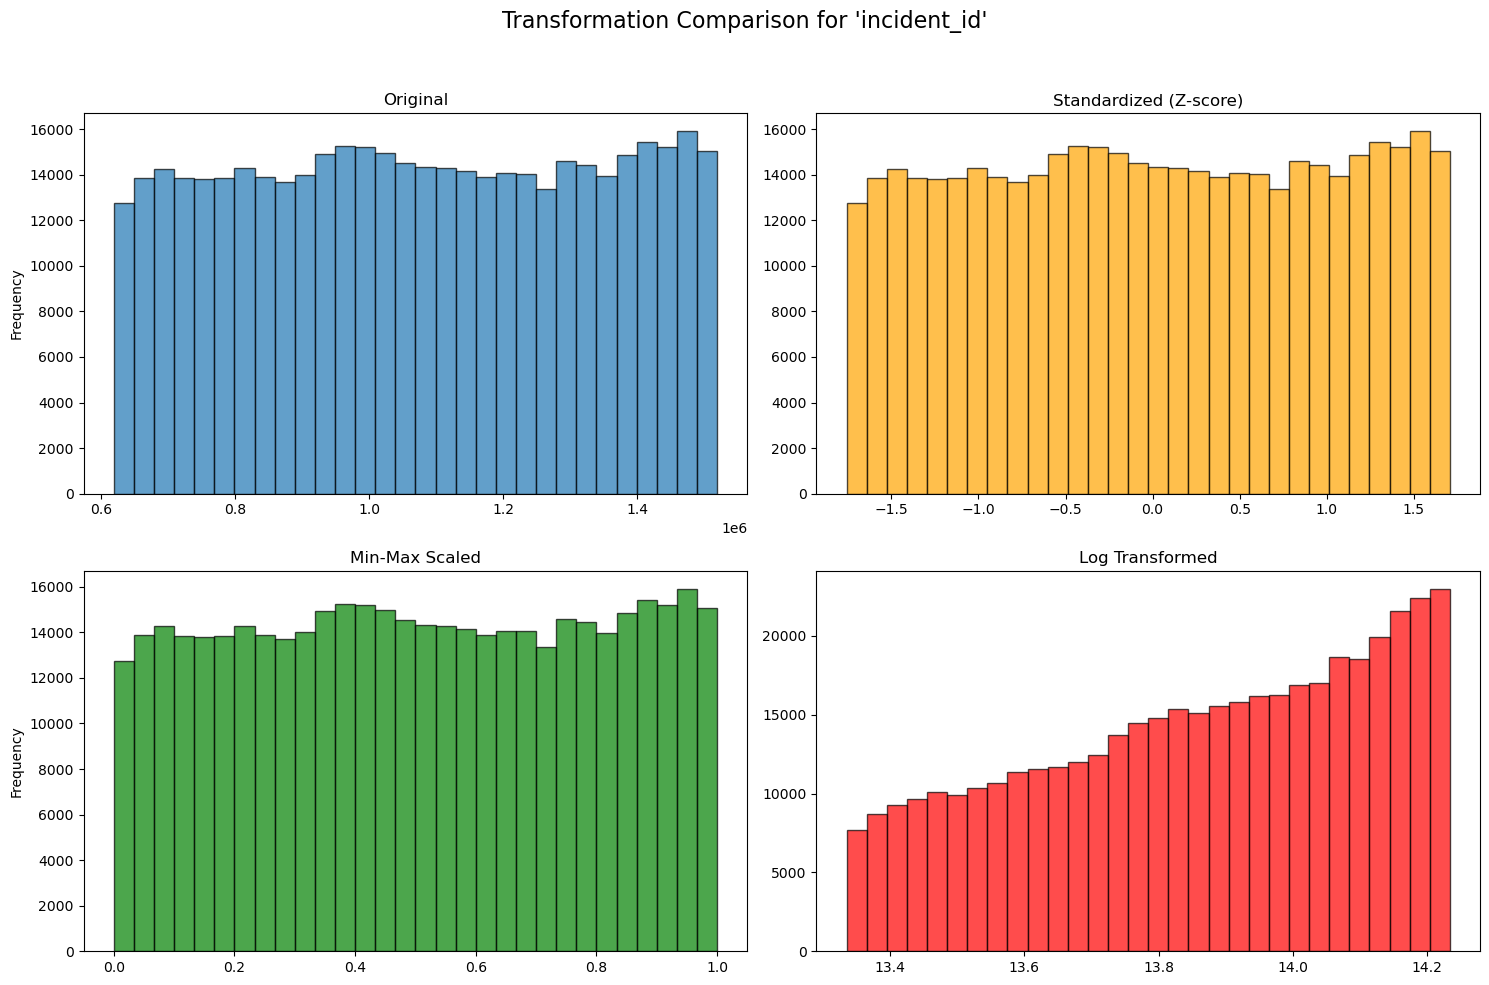



--- Transformation Effects for 'cad_number' ---
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      2.140831e+08  2.216065e+07  1.425135e+08  2.900025e+08  0.074172
Standardized  3.046404e-16  1.000001e+00 -3.229587e+00  3.425868e+00  0.074172
MinMax        4.852541e-01  1.502529e-01  0.000000e+00  1.000000e+00  0.074172
Log           1.917649e+01  1.038939e-01  1.877495e+01  1.948540e+01 -0.049395


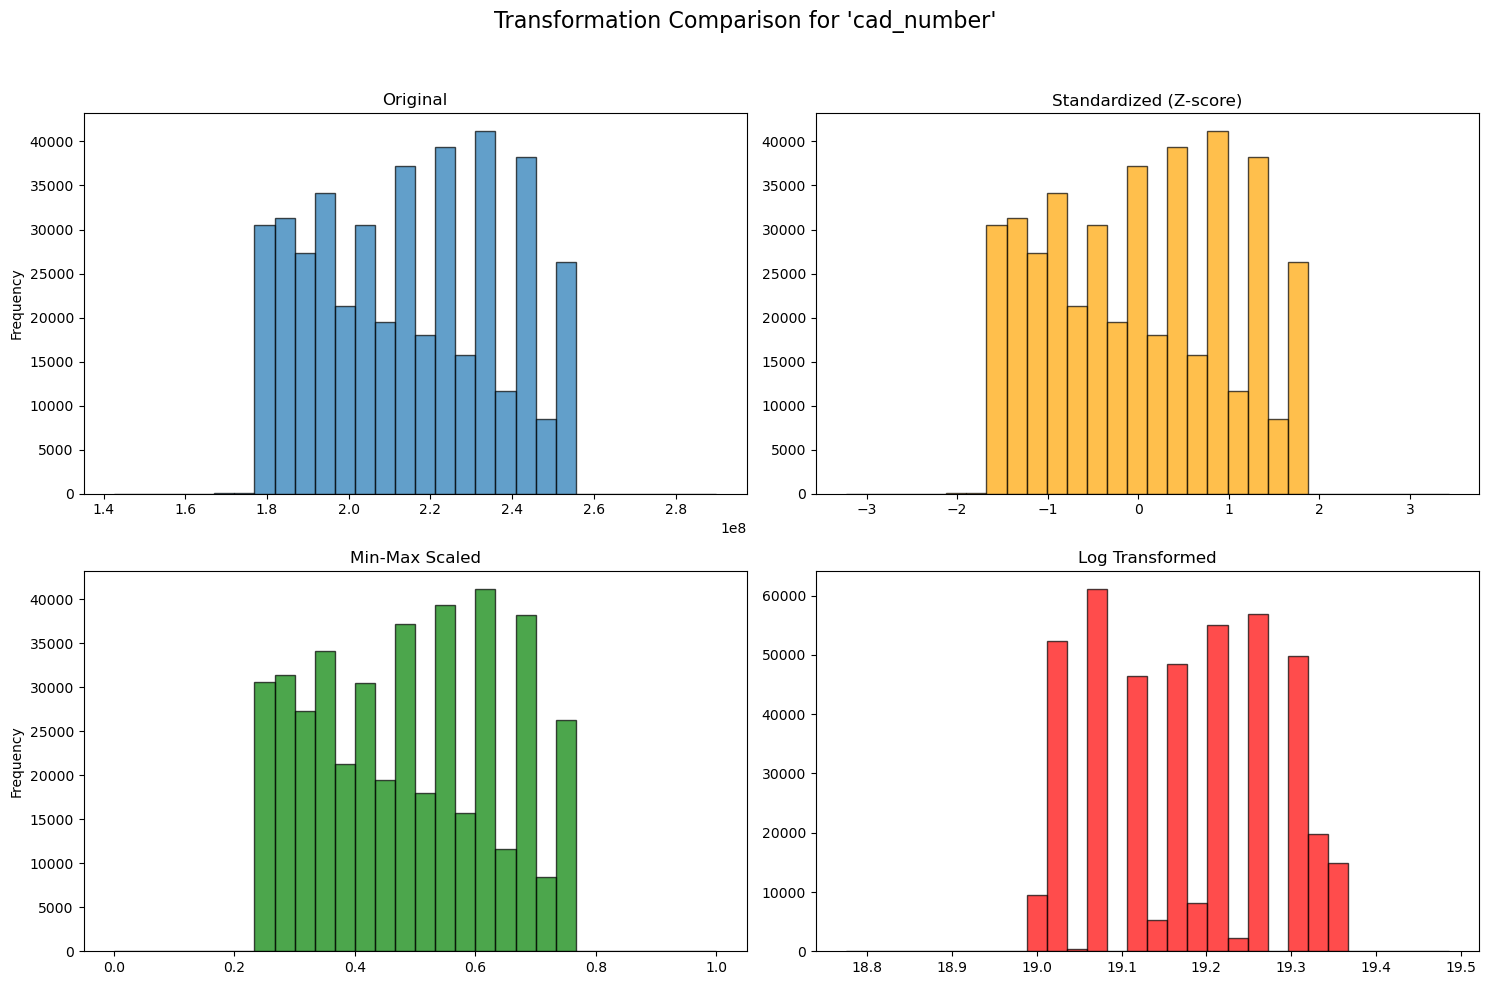



--- Transformation Effects for 'incident_code' ---
------------------------------------------------------------
                      Mean           Std          Min           Max  Skewness
Original      2.419983e+04  25981.869550  1000.000000  75030.000000  0.984485
Standardized -1.583919e-17      1.000001    -0.892925      1.956373  0.984485
MinMax        3.133841e-01      0.350964     0.000000      1.000000  0.984485
Log           9.496961e+00      1.082725     6.908755     11.225657  0.508977


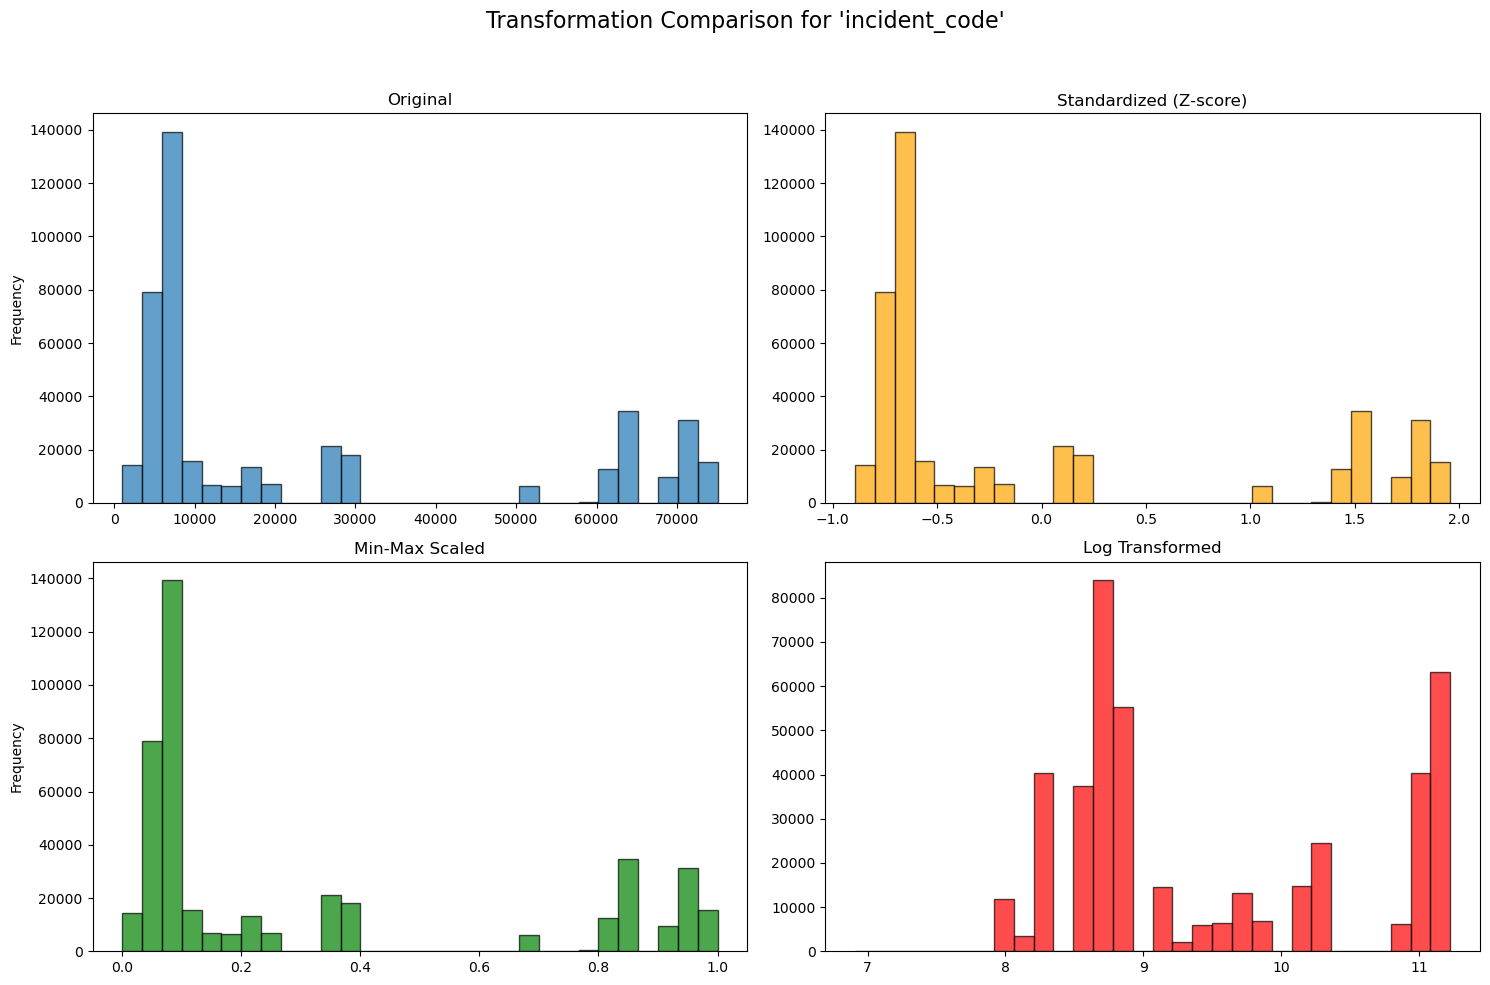



--- Transformation Effects for 'cnn' ---
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      2.466049e+07  1.523209e+06  2.062500e+07  2.824500e+07 -0.763812
Standardized -7.643399e-16  1.000001e+00 -2.649337e+00  2.353265e+00 -0.763812
MinMax        5.295918e-01  1.998962e-01  0.000000e+00  1.000000e+00 -0.763812
Log           1.701873e+01  6.358302e-02  1.684201e+01  1.715643e+01 -0.944916


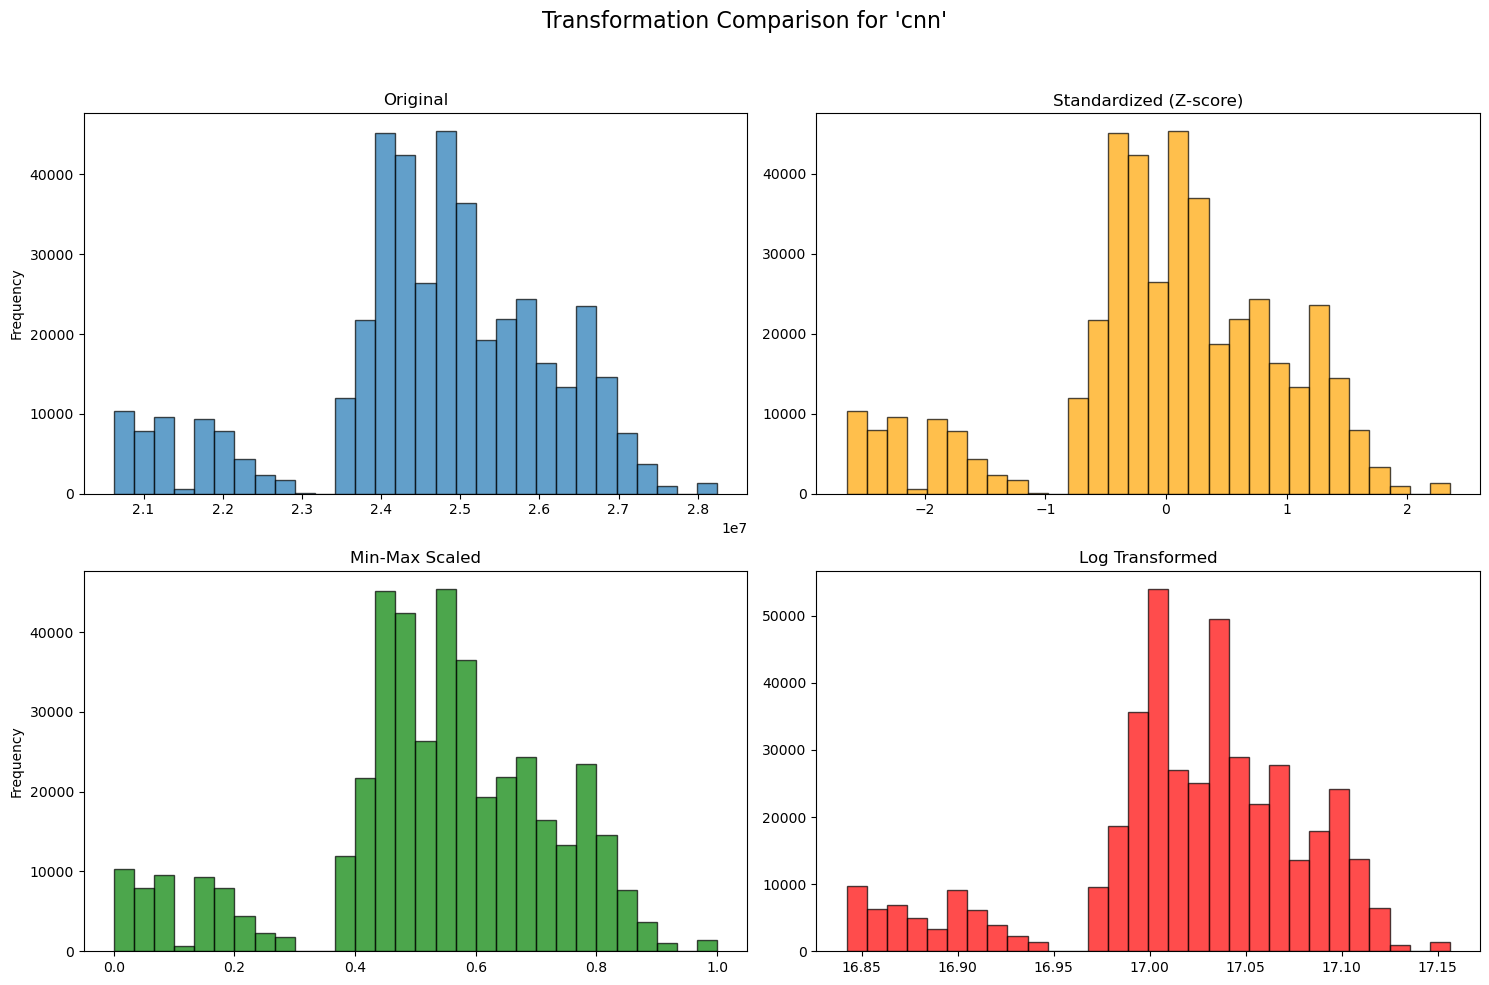



--- Transformation Effects for 'supervisor_district' ---
------------------------------------------------------------
                      Mean       Std       Min        Max  Skewness
Original      5.881845e+00  2.627059  1.000000  11.000000  0.132950
Standardized -8.000028e-17  1.000001 -1.858295   1.948247  0.132950
MinMax        4.881845e-01  0.262706  0.000000   1.000000  0.132950
Log           1.846184e+00  0.423474  0.693147   2.484907 -0.504518


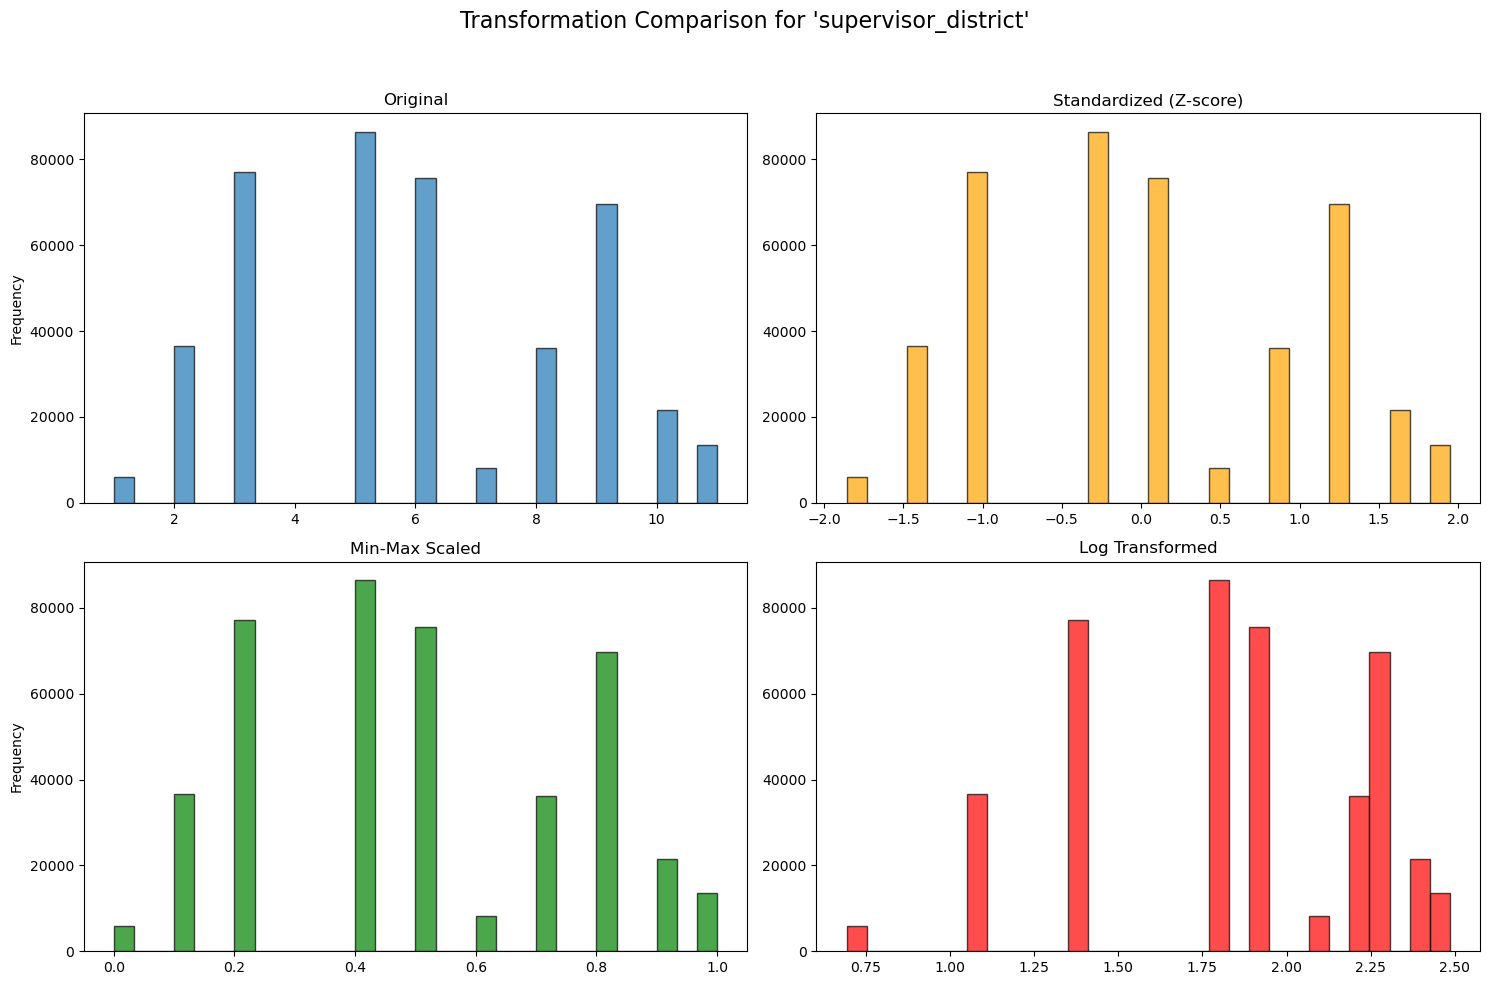



--- Transformation Effects for 'latitude' ---
------------------------------------------------------------
                      Mean       Std        Min        Max  Skewness
Original      3.777388e+01  0.019838  37.720478  37.808212 -0.715401
Standardized  1.250777e-13  1.000001  -2.692113   1.730417 -0.715401
MinMax        6.087269e-01  0.226115   0.000000   1.000000 -0.715401
Log           3.657747e+00  0.000512   3.656369   3.658632 -0.716549


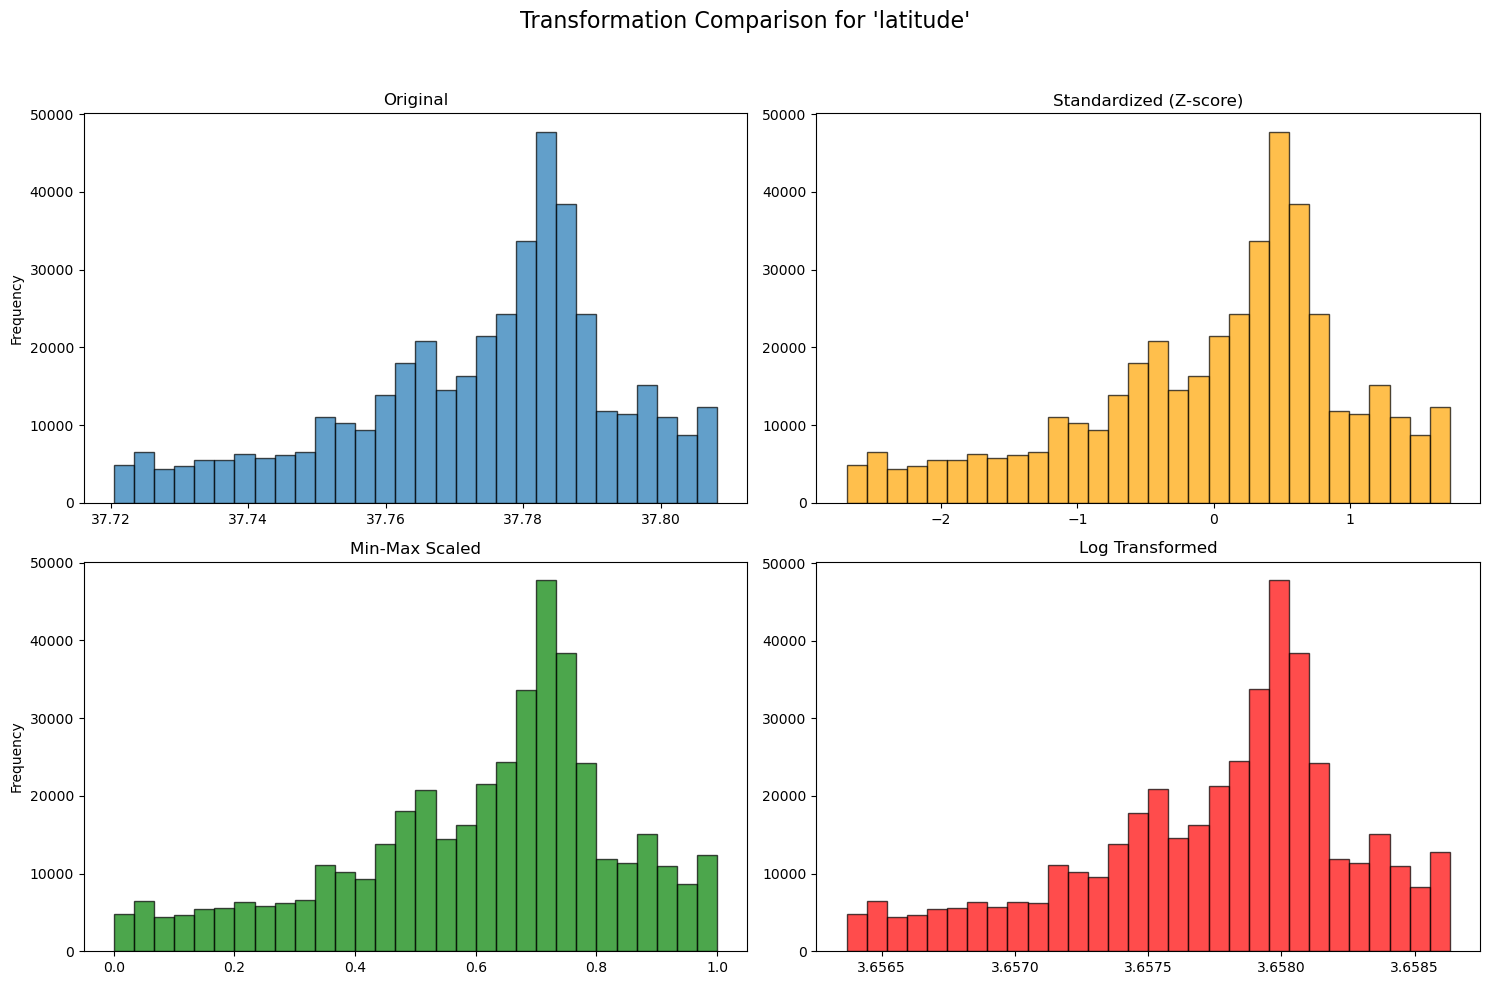



--- Transformation Effects for 'longitude' ---
------------------------------------------------------------
                      Mean       Std         Min         Max  Skewness
Original     -1.224190e+02  0.015736 -122.464142 -122.382690 -0.619216
Standardized -2.109032e-13  1.000001   -2.867314    2.308696 -0.619216
MinMax        5.539623e-01  0.193199    0.000000    1.000000 -0.619216


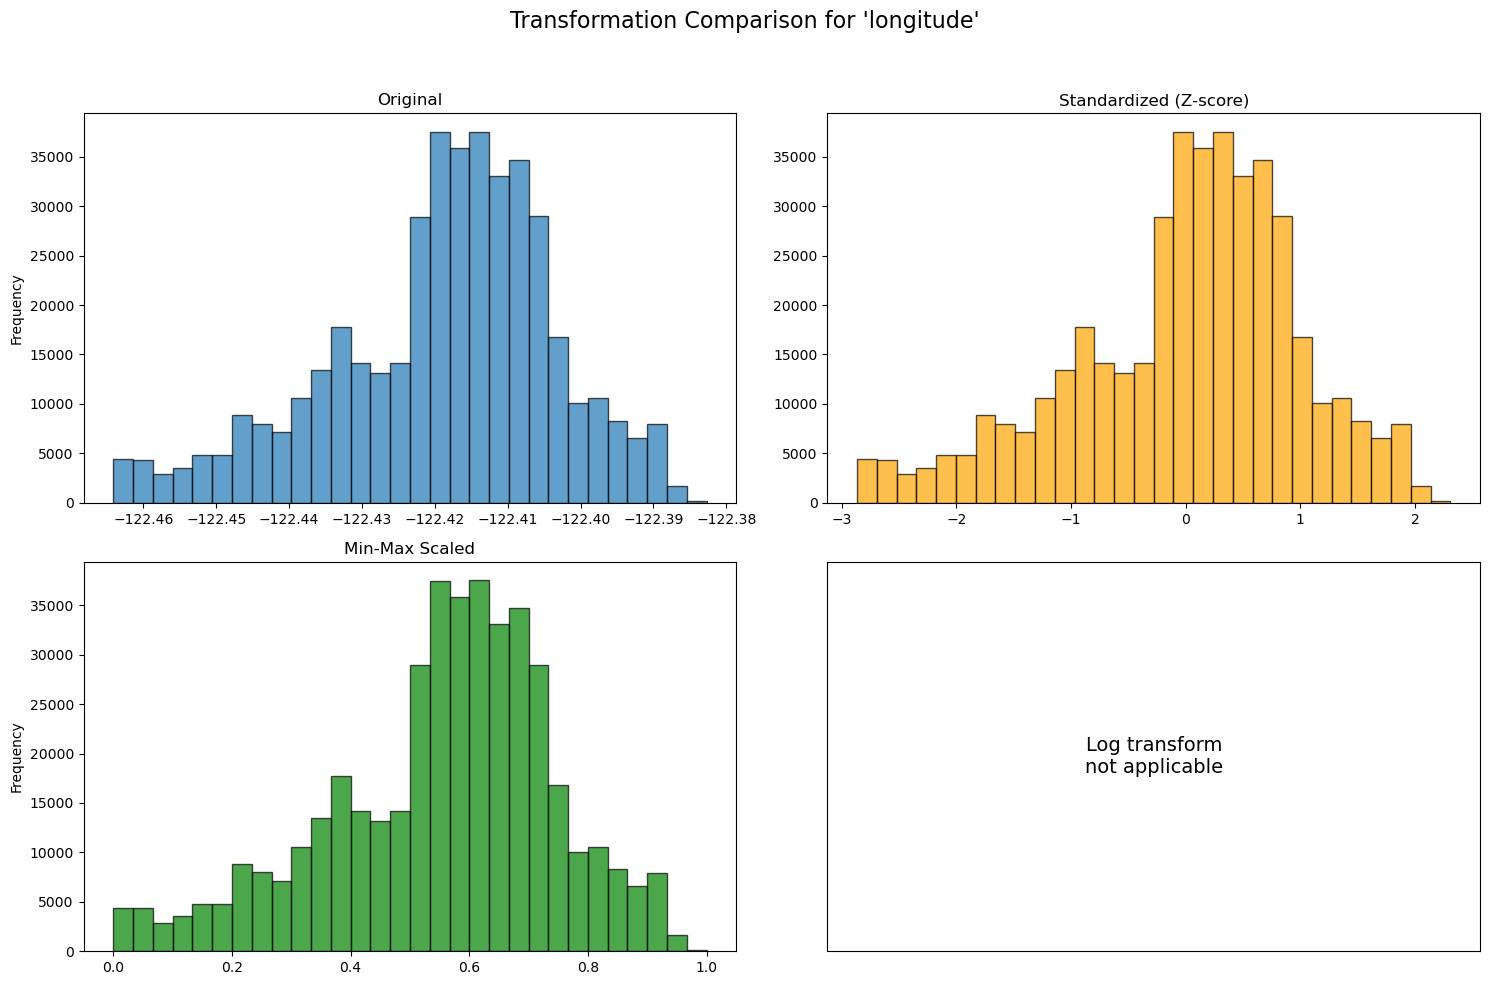

In [40]:
# Create transformed versions of numerical features
print("\nApplying transformations to numerical features...")

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Create new dataframe for transformed features
df_transformed = df.copy()

# Apply transformations
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        # Handle missing values by filling with median
        col_data = df[[col]].fillna(df[col].median())
        
        # 1. Standard Scaling (Z-score normalization)
        df_transformed[f'{col}_standardized'] = standard_scaler.fit_transform(col_data)
        
        # 2. Min-Max Scaling
        df_transformed[f'{col}_minmax'] = minmax_scaler.fit_transform(col_data)
        
        # 3. Log transformation (if all values are positive)
        if (df[col] > 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])
        
        # 4. Square root transformation (if all values are positive)
        if (df[col] >= 0).all():
            df_transformed[f'{col}_sqrt'] = np.sqrt(df[col])

print(f"\n✓ Created {len(df_transformed.columns) - len(df.columns)} transformed features")

# Show transformation effects
if len(numerical_cols) > 0:
    sample_col = numerical_cols[0]
    
    print(f"\nTransformation Effects for '{sample_col}':")
    print("-" * 60)
    
    transformations = {
        'Original': df[sample_col],
        'Standardized': df_transformed[f'{sample_col}_standardized'],
        'MinMax': df_transformed[f'{sample_col}_minmax']
    }
    
    if f'{sample_col}_log' in df_transformed.columns:
        transformations['Log'] = df_transformed[f'{sample_col}_log']
    
    stats_comparison = pd.DataFrame({
        name: {
            'Mean': data.mean(),
            'Std': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Skewness': data.skew()
        }
        for name, data in transformations.items()
    }).T
    
    print(stats_comparison)

# Visualize transformation effects
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for sample_col in numerical_cols:
        print(f"\n\n--- Transformation Effects for '{sample_col}' ---")
        print("-" * 60)
        
        # --- Build the statistics table for the current column ---
        transformations = {
            'Original': df[sample_col],
            'Standardized': df_transformed[f'{sample_col}_standardized'],
            'MinMax': df_transformed[f'{sample_col}_minmax']
        }
        
        # Add log transformation if it exists for this column
        if f'{sample_col}_log' in df_transformed.columns:
            transformations['Log'] = df_transformed[f'{sample_col}_log']
        
        stats_comparison = pd.DataFrame({
            name: {
                'Mean': data.mean(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Skewness': data.skew()
            }
            for name, data in transformations.items()
        }).T
        
        print(stats_comparison)

        # --- Visualize the transformation effects for the current column ---
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f"Transformation Comparison for '{sample_col}'", fontsize=16)

        # Original
        axes[0, 0].hist(df[sample_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Original')
        axes[0, 0].set_ylabel('Frequency')
        
        # Standardized
        axes[0, 1].hist(df_transformed[f'{sample_col}_standardized'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[0, 1].set_title('Standardized (Z-score)')
        
        # MinMax
        axes[1, 0].hist(df_transformed[f'{sample_col}_minmax'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='green')
        axes[1, 0].set_title('Min-Max Scaled')
        axes[1, 0].set_ylabel('Frequency')
        
        # Log (if exists)
        if f'{sample_col}_log' in df_transformed.columns:
            axes[1, 1].hist(df_transformed[f'{sample_col}_log'].dropna(), 
                            bins=30, edgecolor='black', alpha=0.7, color='red')
            axes[1, 1].set_title('Log Transformed')
        else:
            axes[1, 1].text(0.5, 0.5, 'Log transform\nnot applicable', 
                        ha='center', va='center', fontsize=14)
            axes[1, 1].set_xticks([])
            axes[1, 1].set_yticks([])
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

**Visualizations**

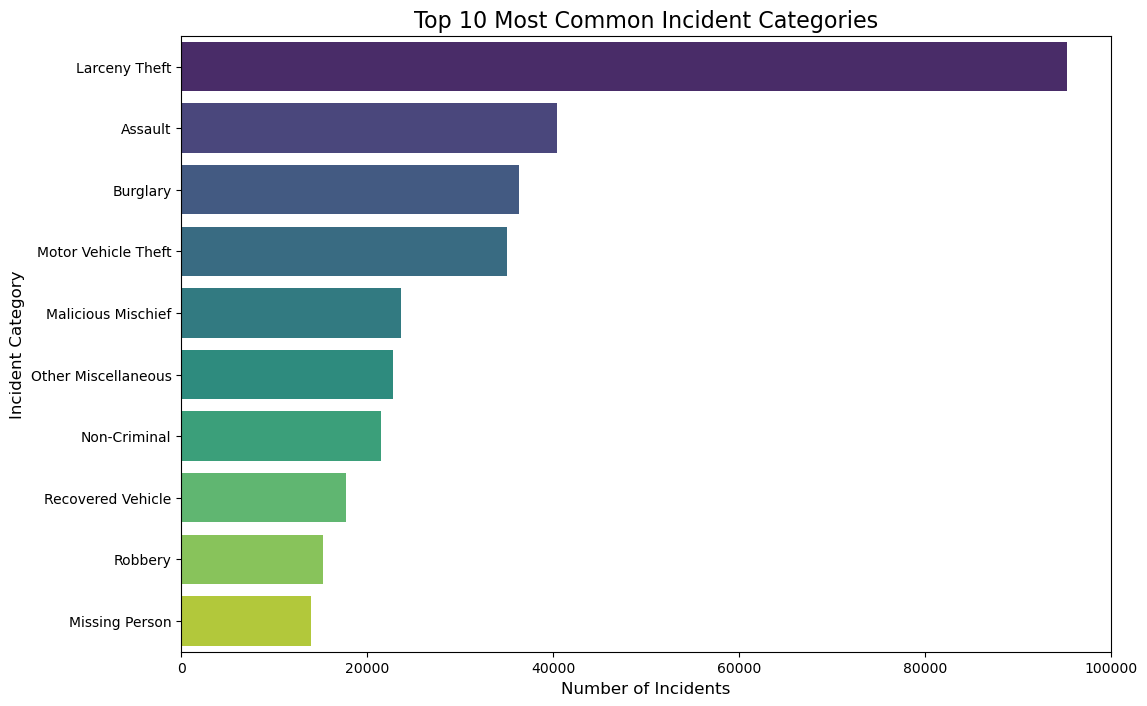

In [41]:
# 1. Top 10 Incident Categories
plt.figure(figsize=(12, 8))
top_10_incidents = df['incident_category'].value_counts().nlargest(10)
sns.barplot(y=top_10_incidents.index, x=top_10_incidents.values, palette='viridis')
plt.title('Top 10 Most Common Incident Categories', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Incident Category', fontsize=12)
plt.show()

Insight: The chart clearly indicates that "Larceny/Theft" is by far the most common category of reported incidents, followed by other categories like "Burglary" and "Assault". This suggests that property crime is a primary concern in the city based on reported data.

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


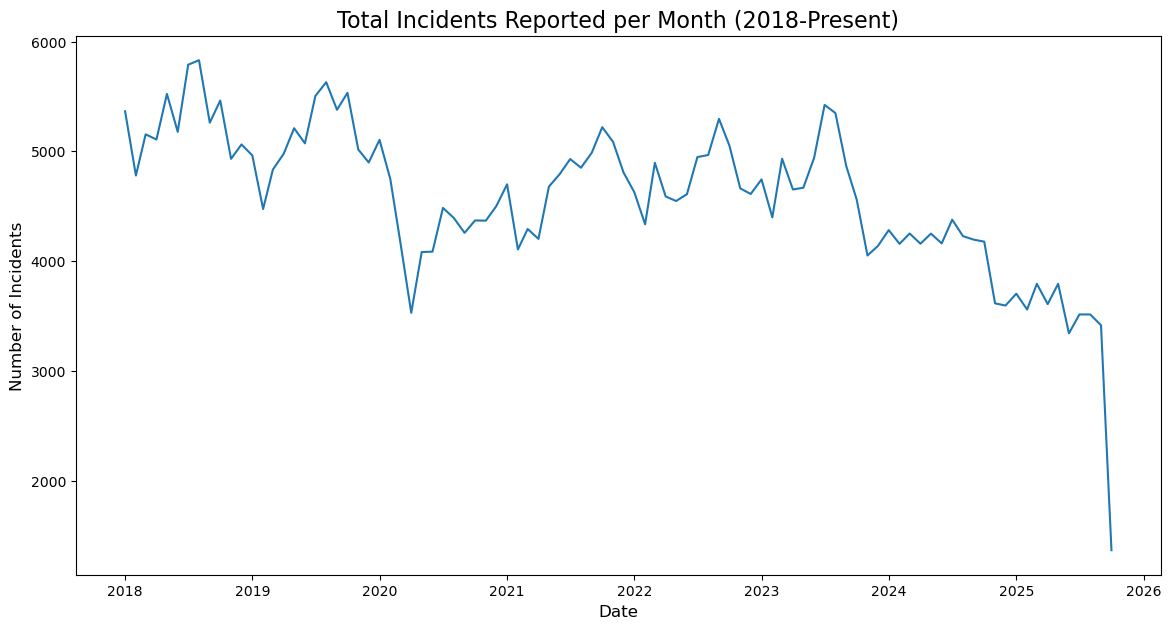

In [42]:
# 2. Incidents Over Time (Monthly Trend)
df['incident_month'] = df['incident_datetime'].dt.to_period('M')
monthly_incidents = df.groupby('incident_month').size()
monthly_incidents.index = monthly_incidents.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_incidents.index, y=monthly_incidents.values)
plt.title('Total Incidents Reported per Month (2018-Present)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.show()

Insight: The trend line shows notable fluctuations. You can likely observe a significant dip in reported incidents around early 2020, which corresponds with the start of COVID-19 lockdowns. Analyzing the trend before and after this period can provide insights into how public behavior and policing practices have changed.

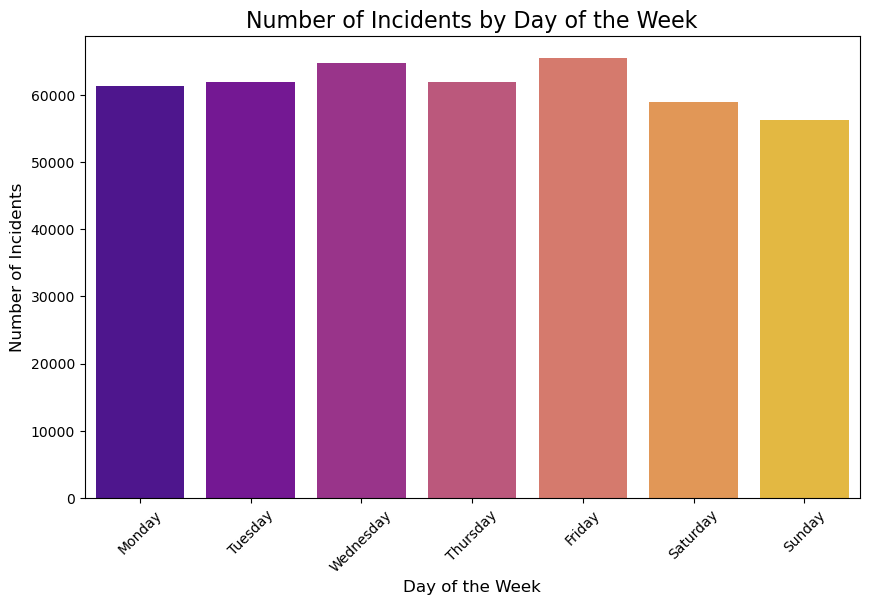

In [43]:
# 3. Incidents by Day of the Week
plt.figure(figsize=(10, 6))
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='incident_day_of_week', data=df, order=days_order, palette='plasma')
plt.title('Number of Incidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: Incidents appear to be highest on Fridays, and Wednesdays and lowest on Sundays

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


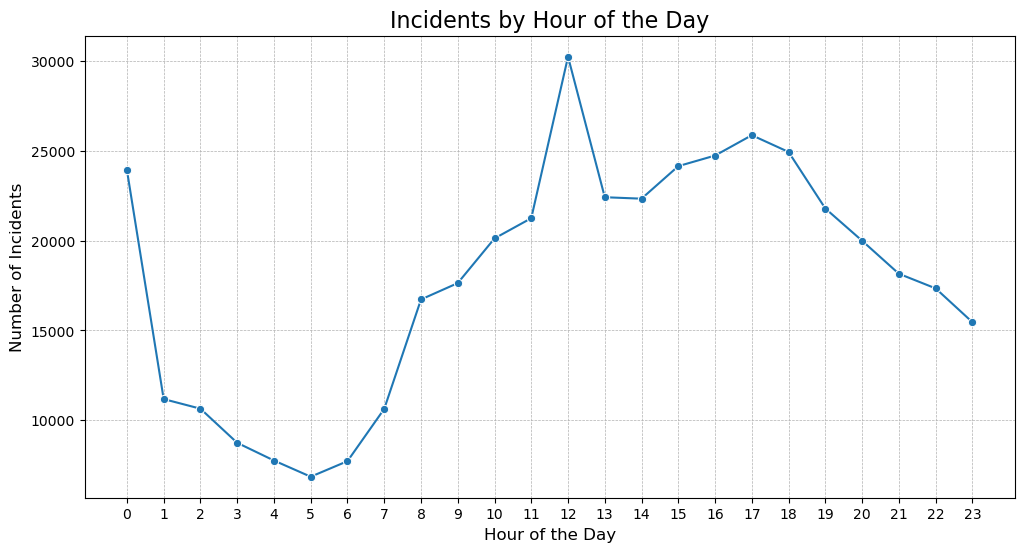

In [44]:
# 4. Incidents by Hour of the Day
plt.figure(figsize=(12, 6))
hourly_incidents = df.groupby(df['incident_datetime'].dt.hour).size()
sns.lineplot(x=hourly_incidents.index, y=hourly_incidents.values, marker='o')
plt.title('Incidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Insight: The data shows a clear pattern: incidents are lowest in the early morning hours (around 5AM) and begin to rise throughout the day, peaking in the late afternoon (areound 12PM) and evening (5-7PM)

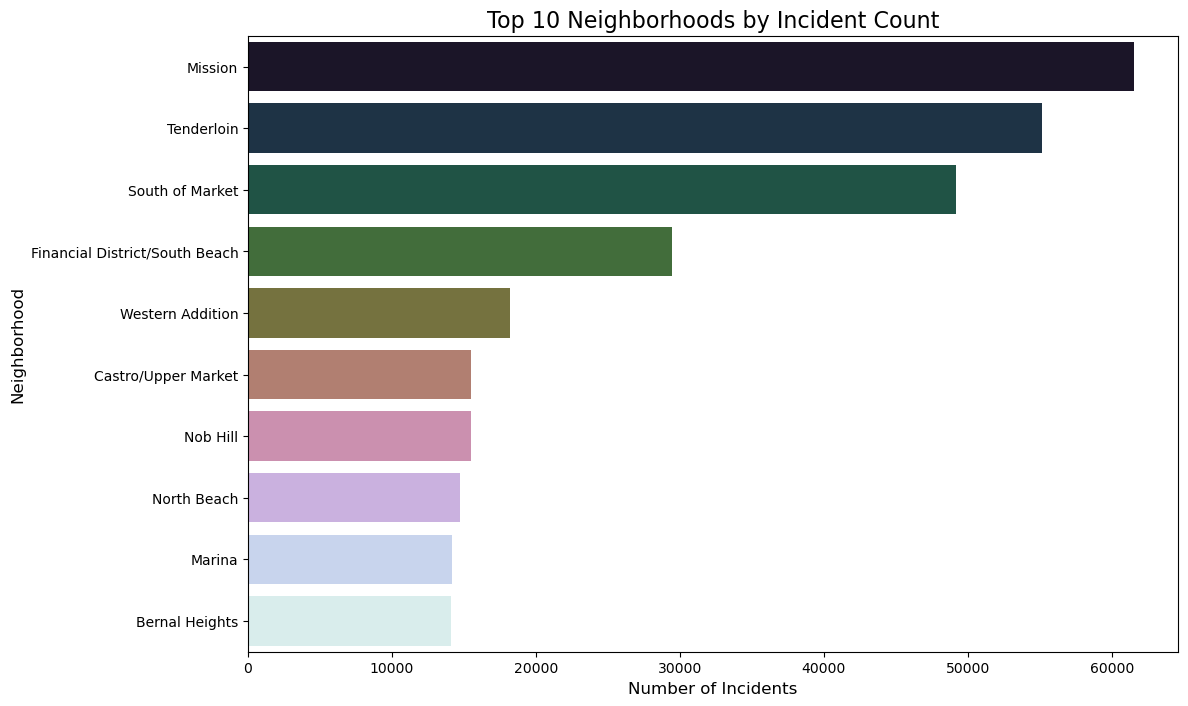

In [45]:
# 5. Top 10 Neighborhoods by Incident Count
plt.figure(figsize=(12, 8))
top_10_neighborhoods = df['analysis_neighborhood'].value_counts().nlargest(10)
sns.barplot(y=top_10_neighborhoods.index, x=top_10_neighborhoods.values, palette='cubehelix')
plt.title('Top 10 Neighborhoods by Incident Count', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

Insight: Neighborhoods like Mission, Tenderloin, and South of Market consistently rank as having the highest number of reported incidents. These are densely populated, commercially active areas, which often correlates with higher crime volumes.

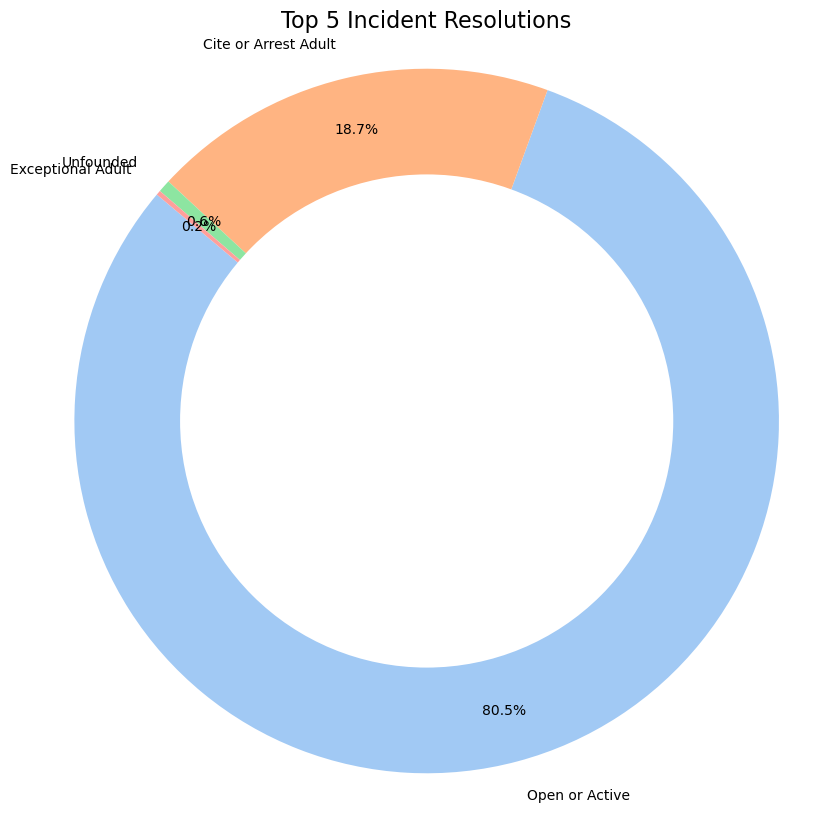

In [46]:
# 6. Incident Resolutions
plt.figure(figsize=(10, 10))
resolution_counts = df['resolution'].value_counts().nlargest(5)

# Create a donut chart
plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.85, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 5 Incident Resolutions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insight: A significant portion of cases result in a citation or arrest. However, a large number also remain "Open or Active," indicating that many reported incidents are not immediately resolved. This highlights the ongoing nature of police casework.

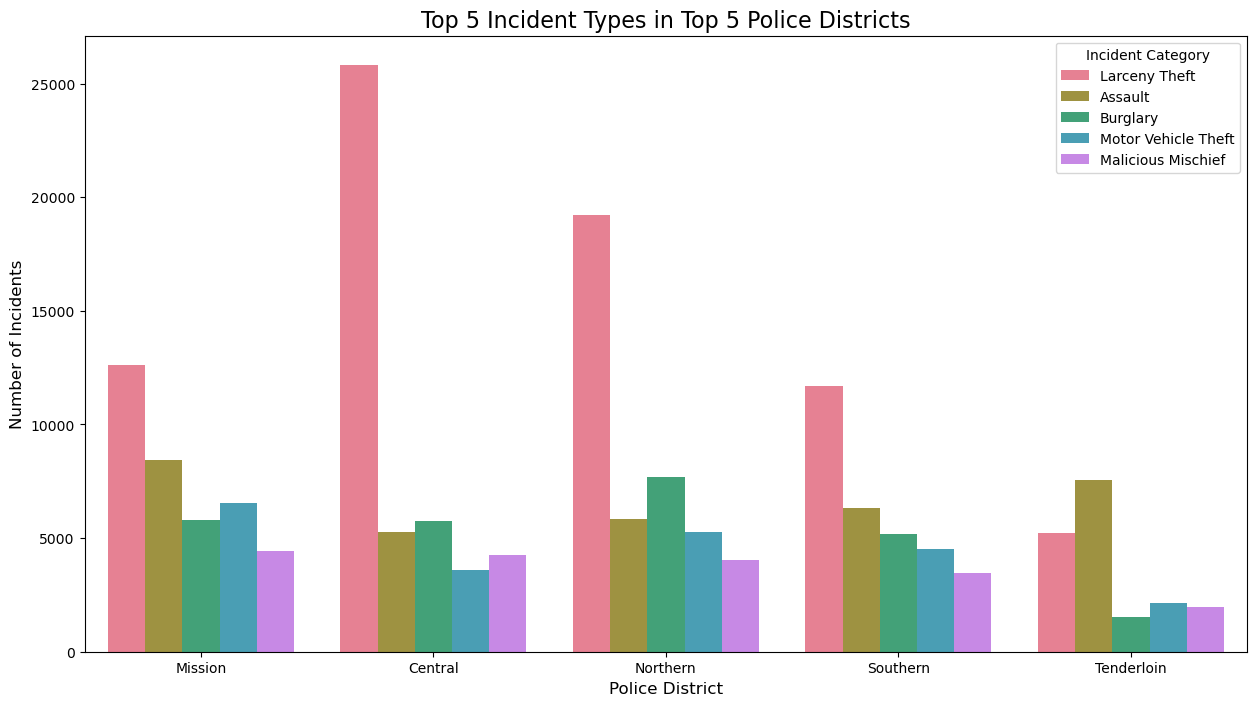

In [47]:
# 7. Top 5 Incident Types in Top 5 Districts
top_districts = df['police_district'].value_counts().nlargest(5).index
top_categories = df['incident_category'].value_counts().nlargest(5).index

# Filter data for top districts and categories
filtered_df = df[df['police_district'].isin(top_districts) & df['incident_category'].isin(top_categories)]

plt.figure(figsize=(15, 8))
sns.countplot(x='police_district', hue='incident_category', data=filtered_df, 
              order=top_districts, hue_order=top_categories, palette='husl')
plt.title('Top 5 Incident Types in Top 5 Police Districts', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Incident Category')
plt.show()

Insight: While "Larceny/Theft" is the dominant category across all top districts, the proportions of other crimes vary. For example, the Central and Southern districts show a very high volume of larceny compared to other crimes, indicating a strong focus on property crime in those areas.

In [48]:
# 8. Hierarchy of Crime (Treemap)
# Get the top 15 categories for clarity
import plotly.express as px
top_categories_for_treemap = df['incident_category'].value_counts().nlargest(15).index
treemap_df = df[df['incident_category'].isin(top_categories_for_treemap)]

# Group data for the treemap
treemap_data = treemap_df.groupby(['incident_category', 'incident_subcategory']).size().reset_index(name='count')

fig = px.treemap(treemap_data, 
                 path=['incident_category', 'incident_subcategory'], 
                 values='count',
                 title='Hierarchical View of Incident Categories and Subcategories',
                 color_continuous_scale='YlOrRd')
fig.show()

Insight: This interactive treemap provides a rich, detailed view of the data. You can immediately see that within the large "Larceny/Theft" category, "Grand Theft from Locked Auto" and "Petty Theft from Locked Auto" are massive sub-categories. This immediately pinpoints vehicle break-ins as a major component of the city's primary crime problem. You can hover over different blocks to explore the hierarchy in detail.

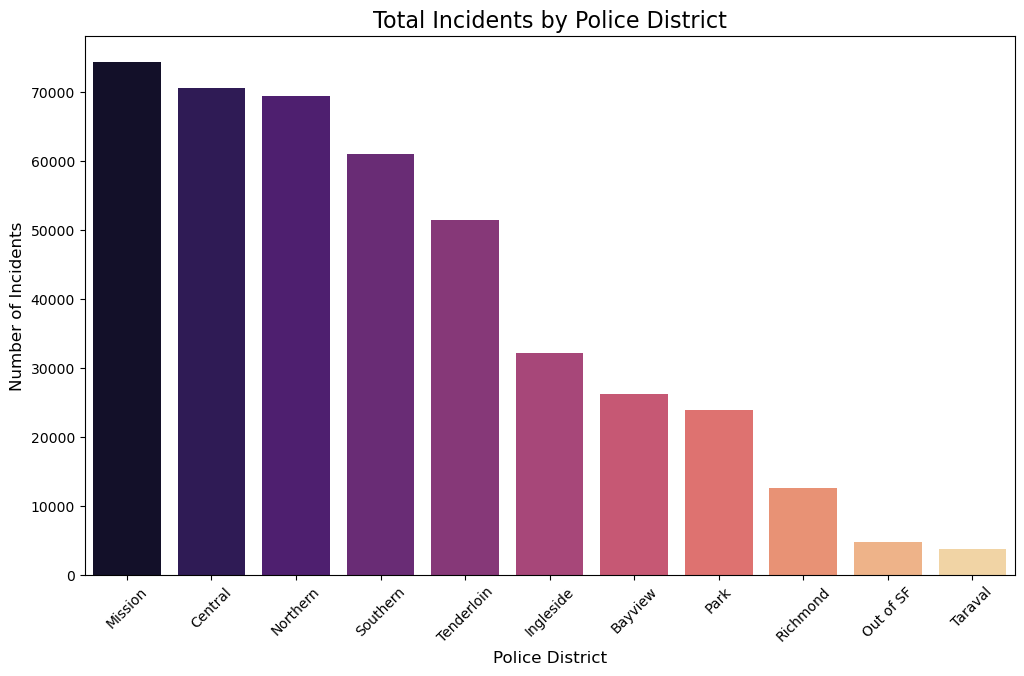

In [49]:
# 9. Incidents by Police District
plt.figure(figsize=(12, 7))
district_counts = df['police_district'].value_counts()
sns.barplot(x=district_counts.index, y=district_counts.values, palette='magma', order=district_counts.index)
plt.title('Total Incidents by Police District', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: The Southern, Mission, and Central districts report the highest number of incidents. These districts cover the dense downtown, SoMa, and Mission areas, which aligns with our previous neighborhood and heatmap analyses.

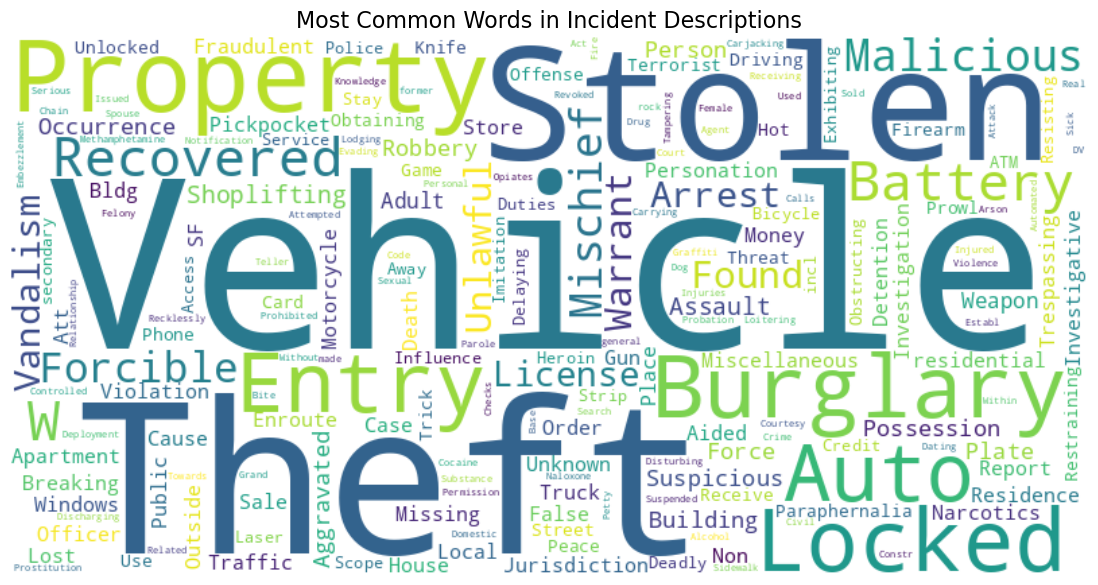

In [50]:
from wordcloud import WordCloud

# 10. Word Cloud of Incident Descriptions
# Concatenate all descriptions into a single string
text = " ".join(desc for desc in df['incident_description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',
    collocations=False # Avoids grouping common word pairs
).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Incident Descriptions', fontsize=16)
plt.show()

Insight: The word cloud immediately highlights the most prominent terms used in police reports. Words like "THEFT," "VEHICLE," "LOCKED," "AUTO," "ATTEMPTED," and "VANDALISM" will likely appear very large. This provides a quick, visceral confirmation that vehicle-related property crime is a dominant theme in the dataset, reinforcing the findings from the bar charts and treemap in a visually compelling way.